In [5]:
!pip install ta
!pip install mplfinance

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import ta  # Technical Analysis library (you may need to install it: pip install ta)
from sklearn.preprocessing import StandardScaler
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import mplfinance as mpf



In [7]:
# Load dataset
# Assuming your dataset is in a CSV file, you can load it as follows:
df = pd.read_csv('NSE_HDFCBANK15.csv', parse_dates=['time'])

In [8]:
# Sort data by time to ensure chronological order
df.sort_values('time', inplace=True)

In [9]:
print(df.head())

                       time     open     high      low    close   Volume
0 2021-07-01 09:15:00+05:30  1500.65  1500.65  1491.30  1492.70  1860331
1 2021-07-01 09:30:00+05:30  1492.10  1493.25  1489.05  1492.50   291342
2 2021-07-01 09:45:00+05:30  1492.80  1493.35  1491.50  1492.35   332650
3 2021-07-01 10:00:00+05:30  1492.50  1493.10  1490.00  1490.75   183182
4 2021-07-01 10:15:00+05:30  1490.75  1497.45  1489.45  1490.80  1635651


In [10]:
# Handle missing values (Fill or drop missing rows)
df.fillna(method='ffill', inplace=True)  # Forward fill

<ipython-input-10-65632161ced0>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [11]:
print(df.head())

                       time     open     high      low    close   Volume
0 2021-07-01 09:15:00+05:30  1500.65  1500.65  1491.30  1492.70  1860331
1 2021-07-01 09:30:00+05:30  1492.10  1493.25  1489.05  1492.50   291342
2 2021-07-01 09:45:00+05:30  1492.80  1493.35  1491.50  1492.35   332650
3 2021-07-01 10:00:00+05:30  1492.50  1493.10  1490.00  1490.75   183182
4 2021-07-01 10:15:00+05:30  1490.75  1497.45  1489.45  1490.80  1635651


In [12]:
sns.set_theme(style="darkgrid", palette="viridis")

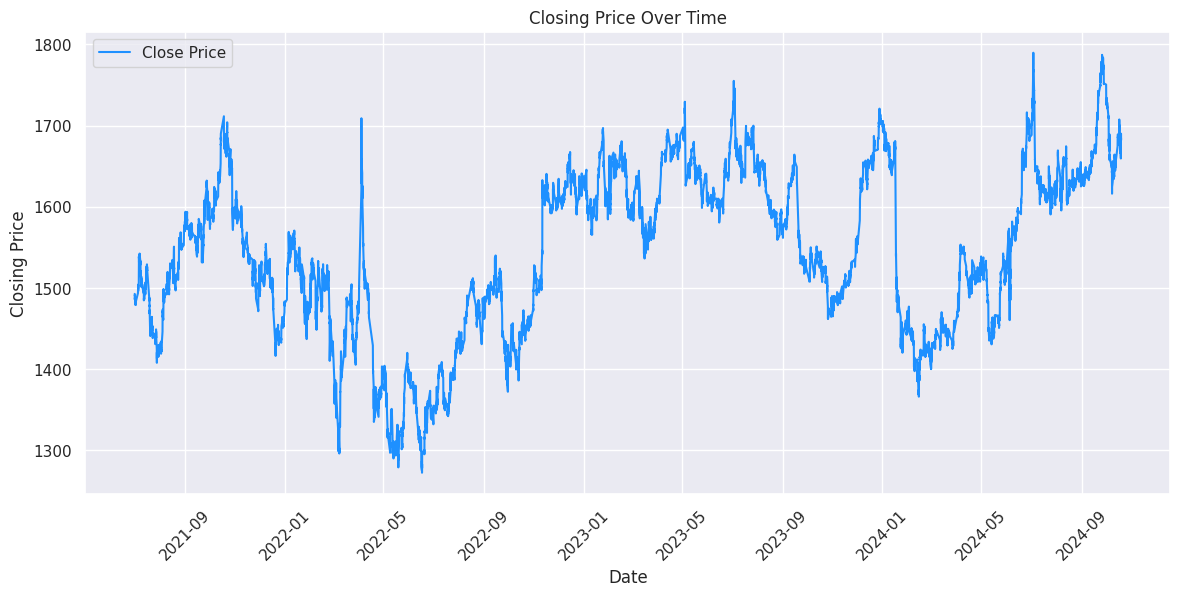

In [13]:
# 1. Line Chart - Closing Price over Time
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['close'], label="Close Price", color="dodgerblue")
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [14]:
df

time     open     high      low    close   Volume
0     2021-07-01 09:15:00+05:30  1500.65  1500.65  1491.30  1492.70  1860331
1     2021-07-01 09:30:00+05:30  1492.10  1493.25  1489.05  1492.50   291342
2     2021-07-01 09:45:00+05:30  1492.80  1493.35  1491.50  1492.35   332650
3     2021-07-01 10:00:00+05:30  1492.50  1493.10  1490.00  1490.75   183182
4     2021-07-01 10:15:00+05:30  1490.75  1497.45  1489.45  1490.80  1635651
...                         ...      ...      ...      ...      ...      ...
20404 2024-10-18 14:15:00+05:30  1688.60  1689.60  1687.40  1687.85   395868
20405 2024-10-18 14:30:00+05:30  1687.65  1688.25  1683.80  1683.80   499103
20406 2024-10-18 14:45:00+05:30  1683.75  1684.00  1680.30  1681.90   701956
20407 2024-10-18 15:00:00+05:30  1682.35  1682.95  1679.00  1682.00  1579556
20408 2024-10-18 15:15:00+05:30  1682.15  1685.35  1680.05  1684.80  1221646

[20409 rows x 6 columns]

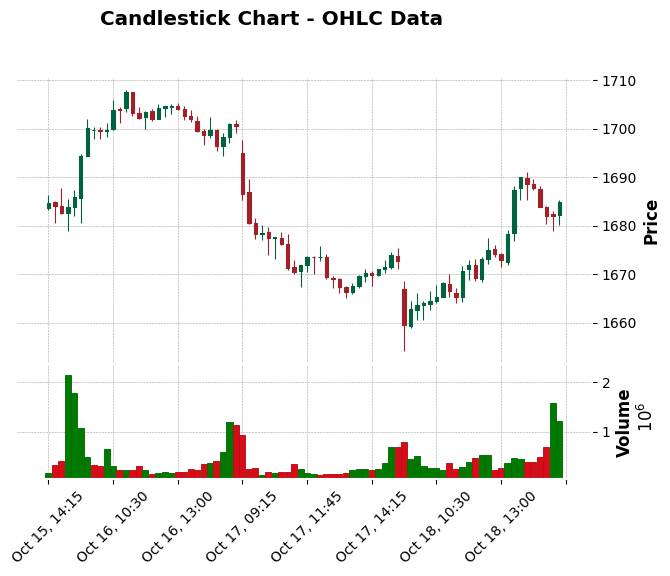

In [15]:
# Rename the 'Volume' column to 'volume' to match mplfinance's expectations
ohlc_data = df[['time', 'open', 'high', 'low', 'close', 'Volume']].rename(columns={'Volume': 'volume'})
ohlc_data = ohlc_data.tail(80)
ohlc_data.set_index('time', inplace=True)

# Plotting the candlestick chart with volume
mpf.plot(ohlc_data, type='candle', style='charles', title="Candlestick Chart - OHLC Data",
         ylabel="Price", ylabel_lower="Volume", volume=True)


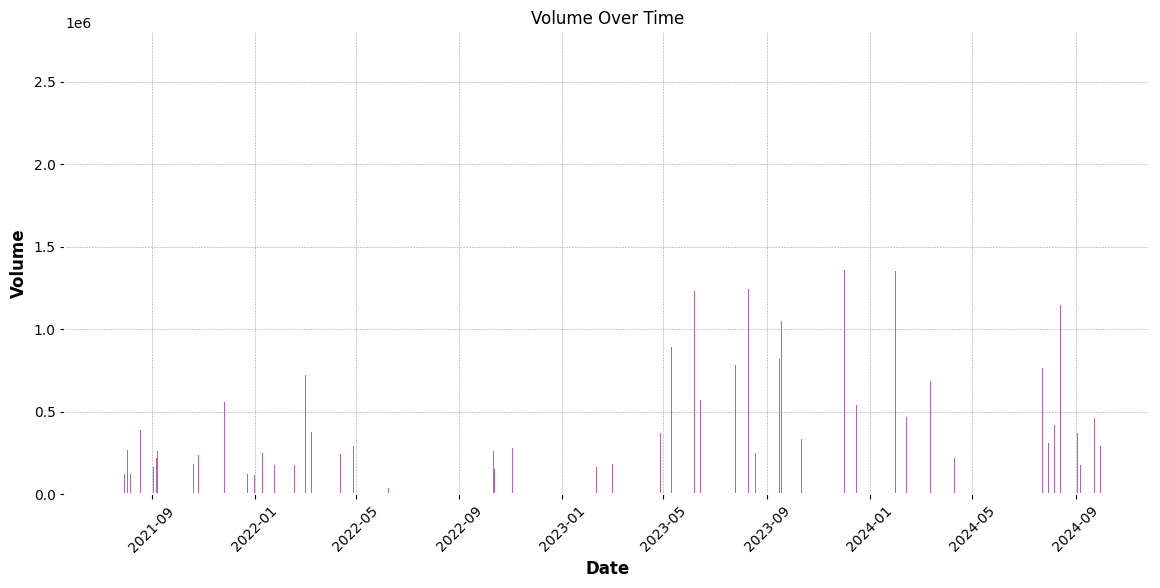

In [16]:
# 3. Volume Over Time - Bar Plot
sampled_df = df.sample(n=80, random_state=1)
plt.figure(figsize=(14, 6))
plt.bar(sampled_df['time'], sampled_df['Volume'], color='purple', alpha=0.6)
plt.title("Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.show()


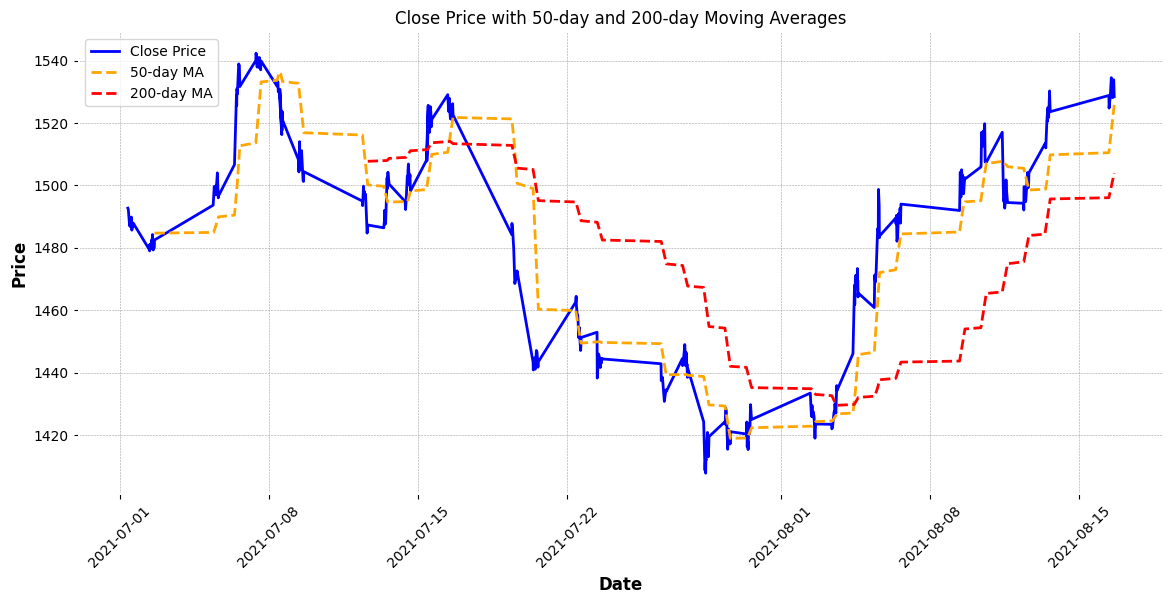

In [17]:
# 4. Moving Averages - Close Price with 50-day and 200-day Moving Averages
df['MA_50'] = df['close'].rolling(window=50).mean()
df['MA_200'] = df['close'].rolling(window=200).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['time'].head(800), df['close'].head(800), label="Close Price", color="blue")
plt.plot(df['time'].head(800), df['MA_50'].head(800), label="50-day MA", color="orange", linestyle='--')
plt.plot(df['time'].head(800), df['MA_200'].head(800), label="200-day MA", color="red", linestyle='--')
plt.title("Close Price with 50-day and 200-day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()


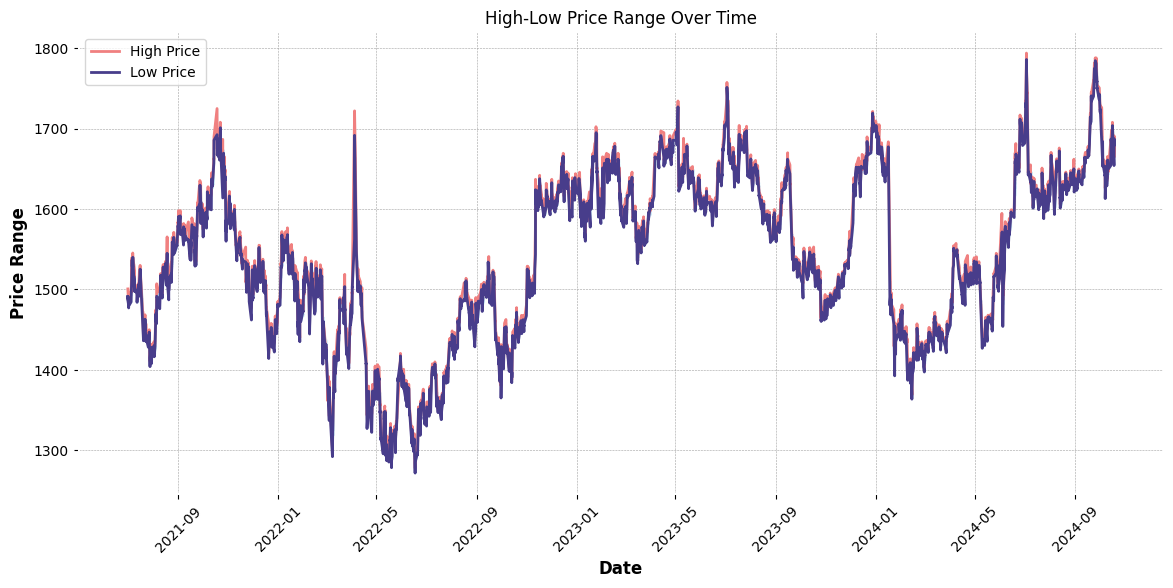

In [18]:
# 5. High-Low Range Over Time - Area Chart
plt.figure(figsize=(14, 6))
plt.fill_between(df['time'], df['high'], df['low'], color='skyblue', alpha=0.4)
plt.plot(df['time'], df['high'], color='lightcoral', label='High Price')
plt.plot(df['time'], df['low'], color='darkslateblue', label='Low Price')
plt.title("High-Low Price Range Over Time")
plt.xlabel("Date")
plt.ylabel("Price Range")
plt.legend()
plt.xticks(rotation=45)
plt.show()

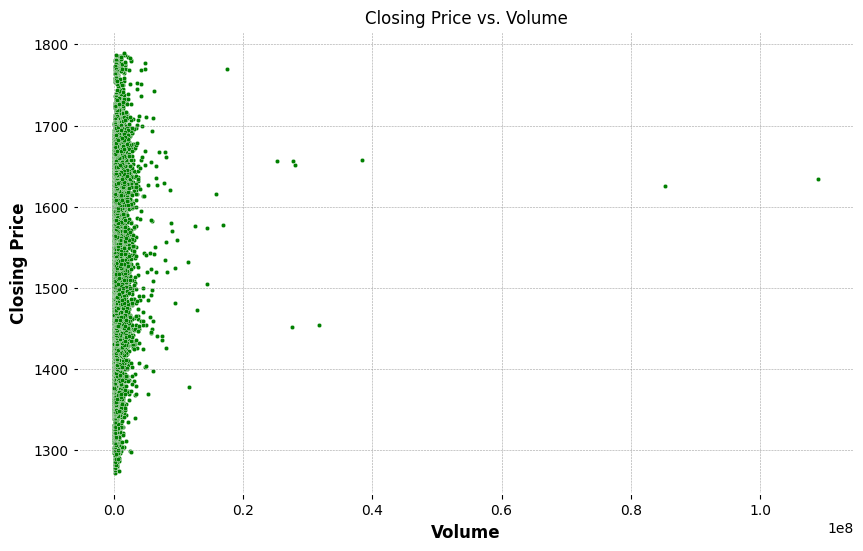

In [19]:
# 6. Scatter Plot - Closing Price vs. Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='close', data=df, color="green", s=10)
plt.title("Closing Price vs. Volume")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.show()

In [20]:
# Feature Engineering - Create technical indicators using the ta library
# Example indicators: RSI, MACD, Bollinger Bands, and Moving Averages

# Relative Strength Index (RSI)
df['rsi'] = ta.momentum.RSIIndicator(close=df['close'], window=14).rsi()

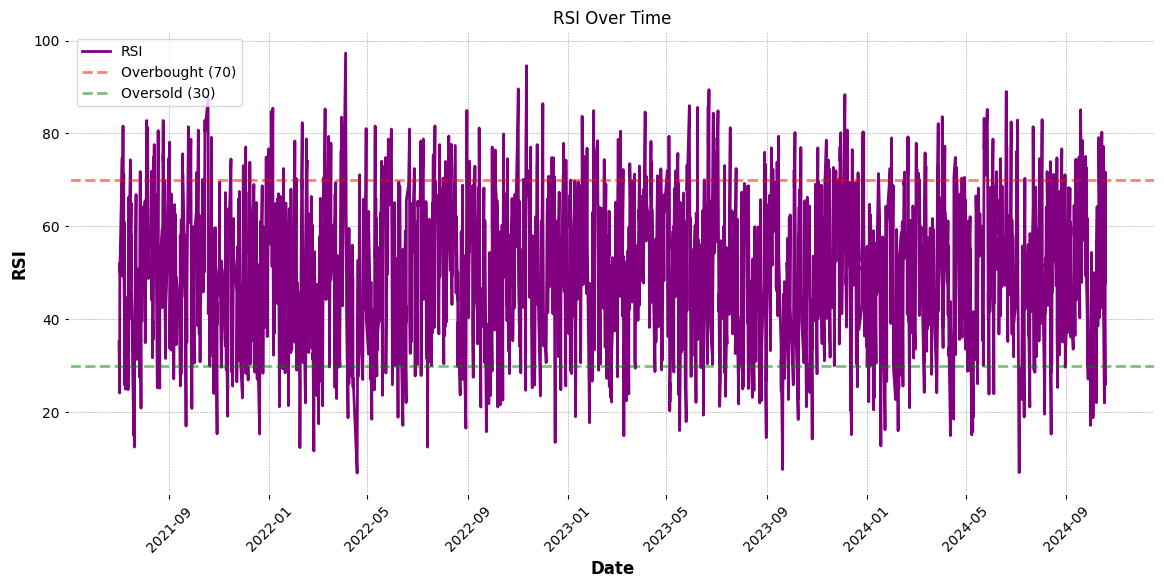

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['rsi'], label="RSI", color="purple")
plt.axhline(70, linestyle='--', alpha=0.5, color='red', label="Overbought (70)")
plt.axhline(30, linestyle='--', alpha=0.5, color='green', label="Oversold (30)")
plt.title("RSI Over Time")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [22]:
# Moving Averages (MA)
df['ma_50'] = df['close'].rolling(window=50).mean()
df['ma_200'] = df['close'].rolling(window=200).mean()

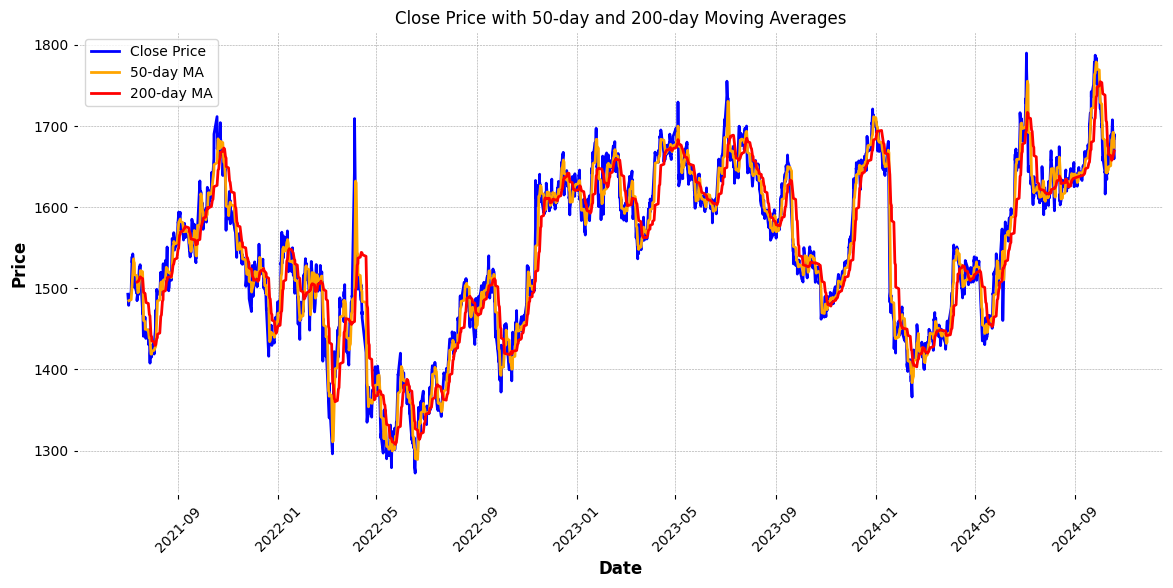

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['close'], label="Close Price", color="blue")
plt.plot(df['time'], df['ma_50'], label="50-day MA", color="orange")
plt.plot(df['time'], df['ma_200'], label="200-day MA", color="red")
plt.title("Close Price with 50-day and 200-day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [24]:
# Exponential Moving Average (EMA)
df['ema_12'] = df['close'].ewm(span=12, adjust=False).mean()
df['ema_26'] = df['close'].ewm(span=26, adjust=False).mean()

In [25]:
# MACD (Moving Average Convergence Divergence)
df['macd_diff'] = ta.trend.MACD(close=df['close']).macd_diff()

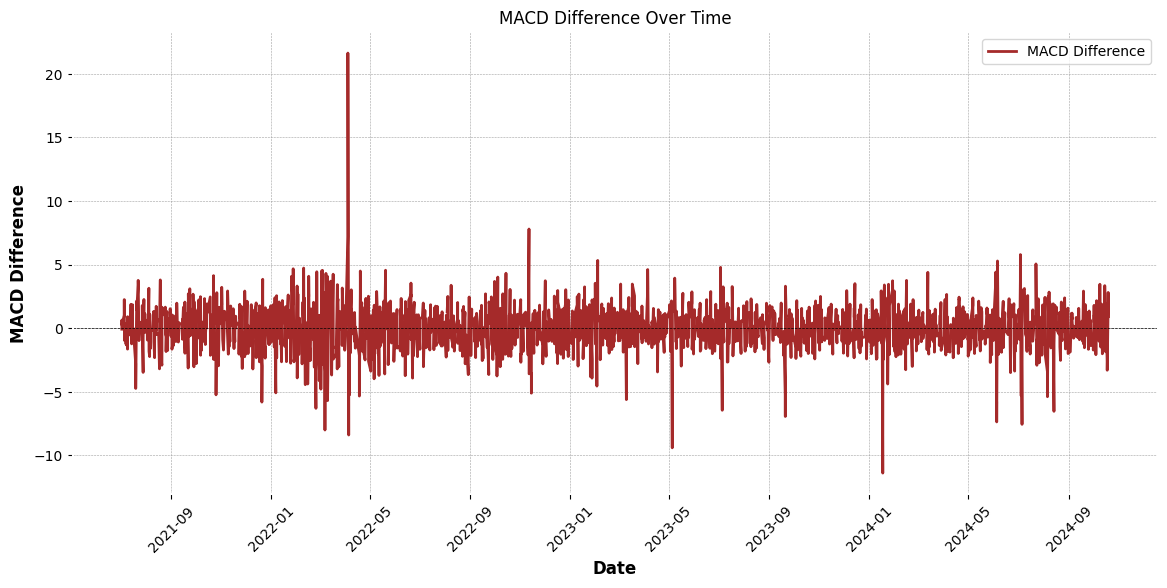

In [26]:
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['macd_diff'], label="MACD Difference", color="brown")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.title("MACD Difference Over Time")
plt.xlabel("Date")
plt.ylabel("MACD Difference")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [27]:
# Bollinger Bands
bollinger = ta.volatility.BollingerBands(close=df['close'], window=20, window_dev=2)
df['bollinger_mavg'] = bollinger.bollinger_mavg()
df['bollinger_hband'] = bollinger.bollinger_hband()
df['bollinger_lband'] = bollinger.bollinger_lband()



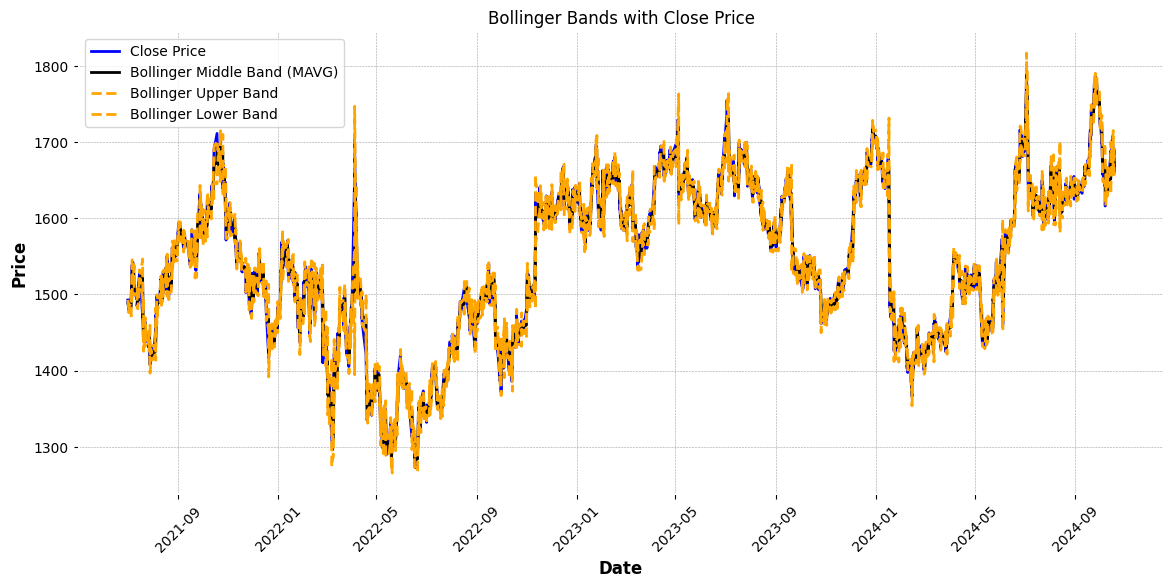

In [28]:
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['close'], label="Close Price", color="blue")
plt.plot(df['time'], df['bollinger_mavg'], label="Bollinger Middle Band (MAVG)", color="black")
plt.plot(df['time'], df['bollinger_hband'], label="Bollinger Upper Band", color="orange", linestyle='--')
plt.plot(df['time'], df['bollinger_lband'], label="Bollinger Lower Band", color="orange", linestyle='--')
plt.fill_between(df['time'], df['bollinger_lband'], df['bollinger_hband'], color='orange', alpha=0.1)
plt.title("Bollinger Bands with Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [29]:
# Price change percentage over the last 15 minutes
df['price_change_15m'] = df['close'].pct_change(1) * 100

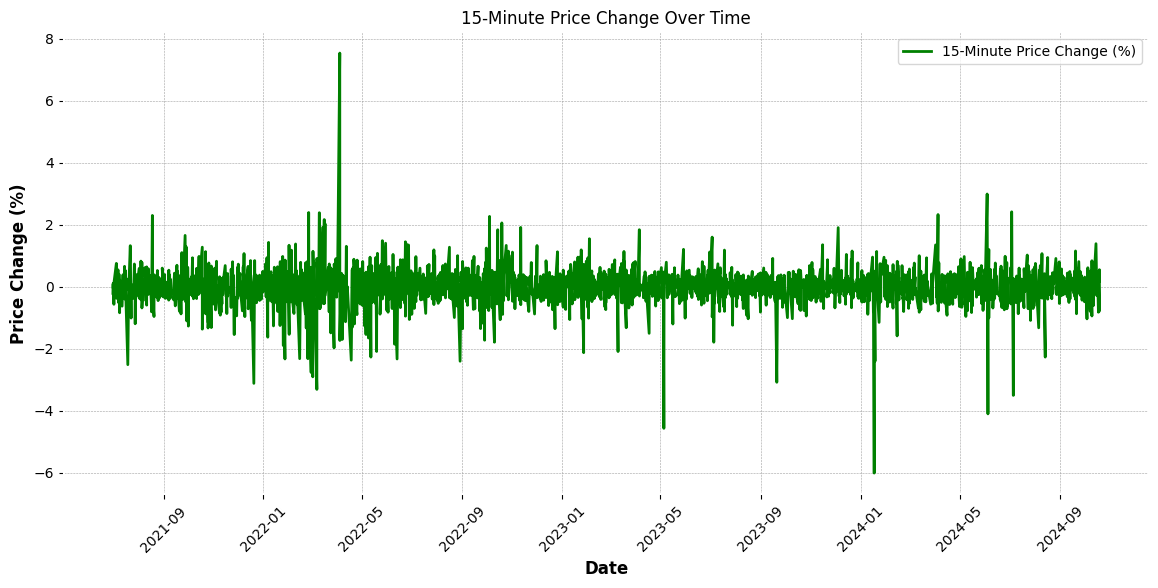

In [30]:
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['price_change_15m'], label="15-Minute Price Change (%)", color="green")
plt.title("15-Minute Price Change Over Time")
plt.xlabel("Date")
plt.ylabel("Price Change (%)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


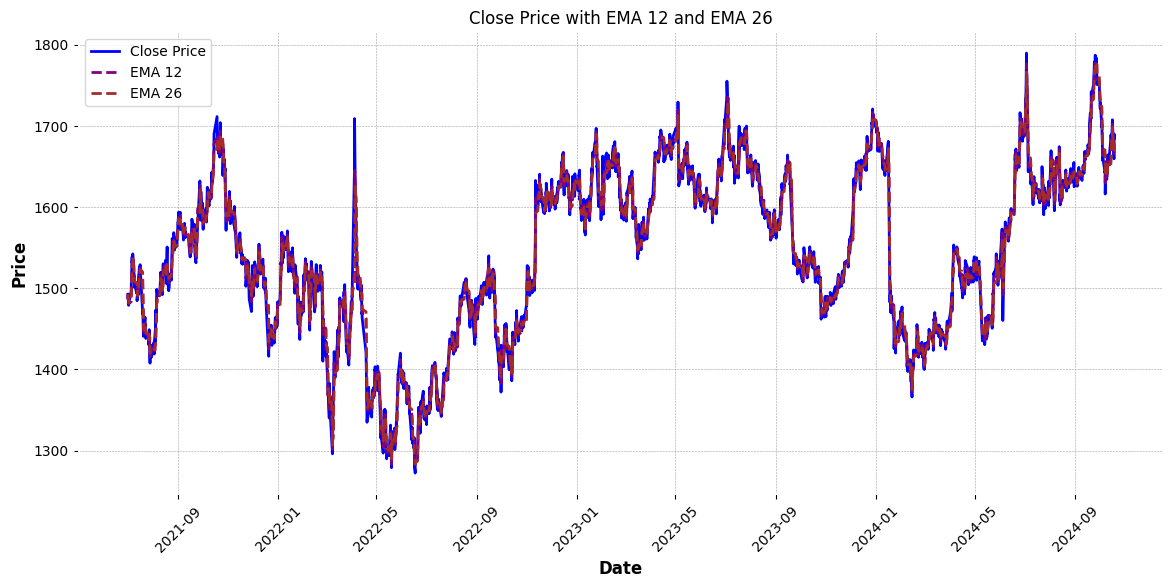

In [31]:
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['close'], label="Close Price", color="blue")
plt.plot(df['time'], df['ema_12'], label="EMA 12", color="purple", linestyle='--')
plt.plot(df['time'], df['ema_26'], label="EMA 26", color="brown", linestyle='--')
plt.title("Close Price with EMA 12 and EMA 26")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()


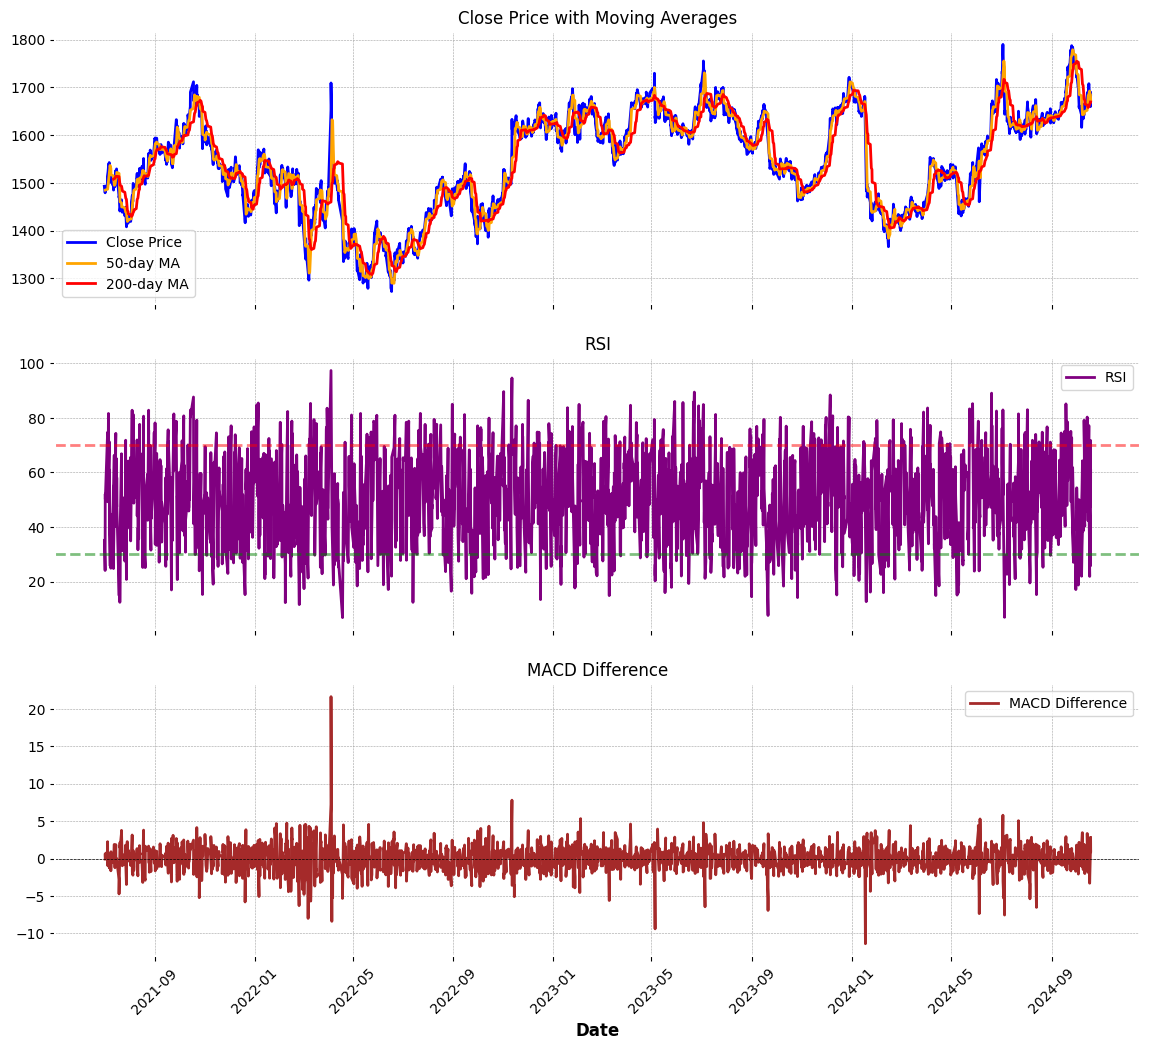

In [32]:
fig, ax = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
# Close Price and Moving Averages
ax[0].plot(df['time'], df['close'], label="Close Price", color="blue")
ax[0].plot(df['time'], df['ma_50'], label="50-day MA", color="orange")
ax[0].plot(df['time'], df['ma_200'], label="200-day MA", color="red")
ax[0].set_title("Close Price with Moving Averages")
ax[0].legend()

# RSI
ax[1].plot(df['time'], df['rsi'], label="RSI", color="purple")
ax[1].axhline(70, linestyle='--', alpha=0.5, color='red')
ax[1].axhline(30, linestyle='--', alpha=0.5, color='green')
ax[1].set_title("RSI")
ax[1].legend()

# MACD Difference
ax[2].plot(df['time'], df['macd_diff'], label="MACD Difference", color="brown")
ax[2].axhline(0, color='black', linestyle='--', linewidth=0.5)
ax[2].set_title("MACD Difference")
ax[2].legend()

plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()


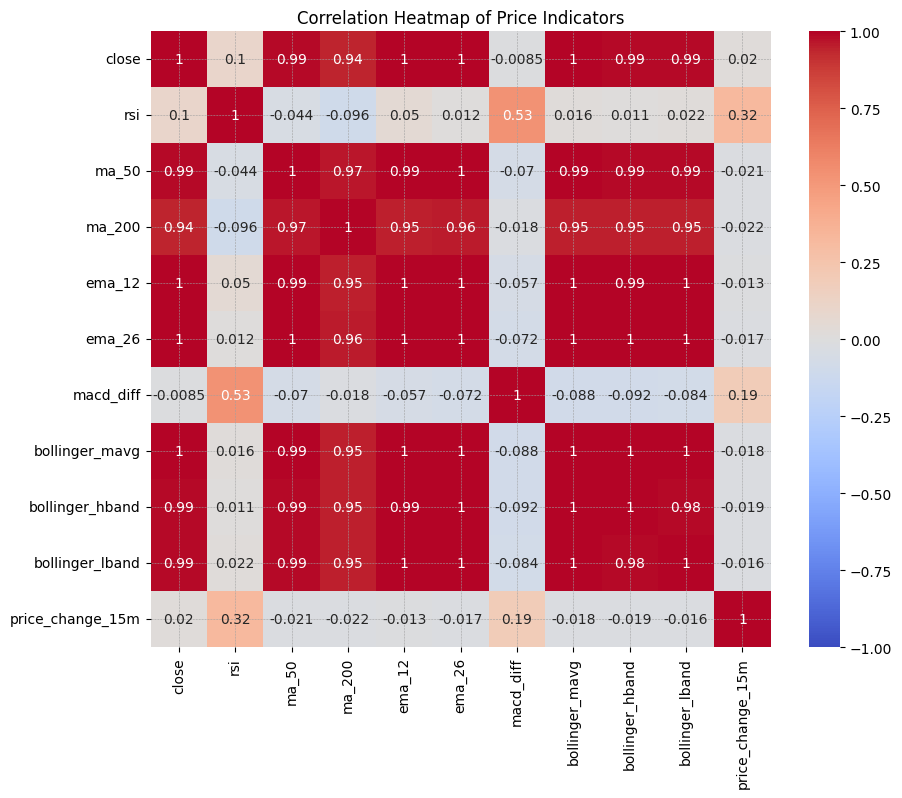

In [33]:
import seaborn as sns

# Selecting only numeric columns for correlation
corr_data = df[['close', 'rsi', 'ma_50', 'ma_200', 'ema_12', 'ema_26', 'macd_diff', 'bollinger_mavg', 'bollinger_hband', 'bollinger_lband', 'price_change_15m']]
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Price Indicators")
plt.show()


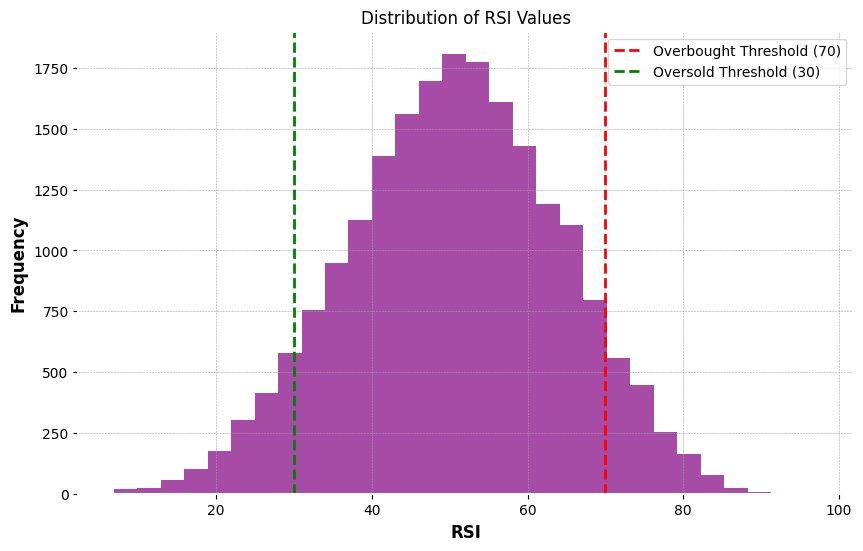

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df['rsi'], bins=30, color="purple", alpha=0.7)
plt.axvline(70, color='red', linestyle='--', label="Overbought Threshold (70)")
plt.axvline(30, color='green', linestyle='--', label="Oversold Threshold (30)")
plt.title("Distribution of RSI Values")
plt.xlabel("RSI")
plt.ylabel("Frequency")
plt.legend()
plt.show()


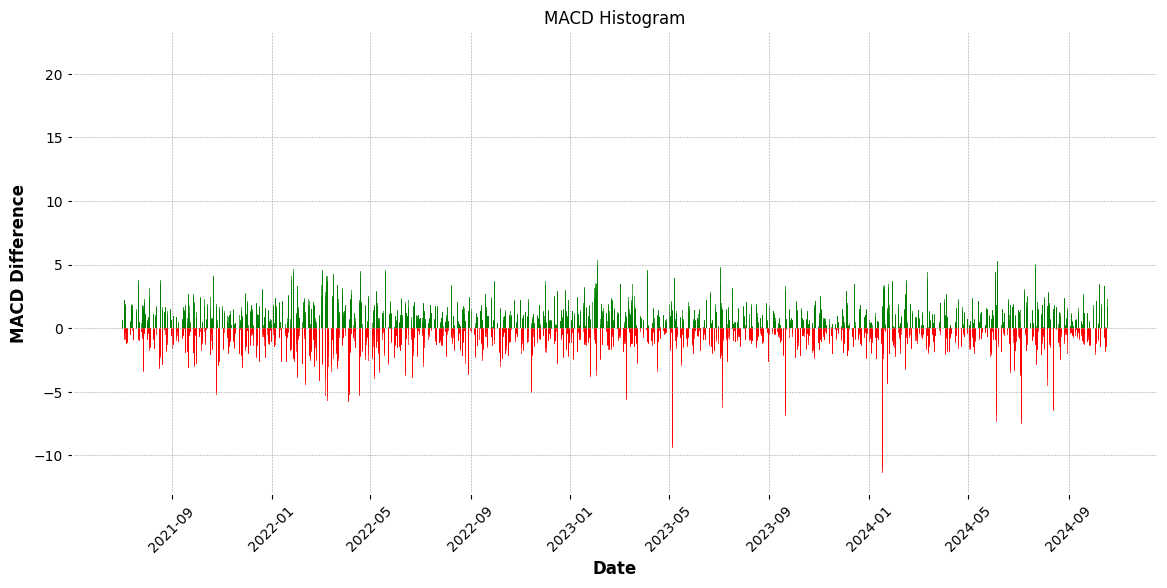

In [35]:
plt.figure(figsize=(14, 6))
plt.bar(df['time'], df['macd_diff'], color=['green' if val >= 0 else 'red' for val in df['macd_diff']], alpha=0.7)
plt.title("MACD Histogram")
plt.xlabel("Date")
plt.ylabel("MACD Difference")
plt.xticks(rotation=45)
plt.show()


In [36]:
# Limit to the last 200 data points
data_200 = df.tail(800)
data_200 = data_200.rename(columns={'Volume': 'volume'})


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


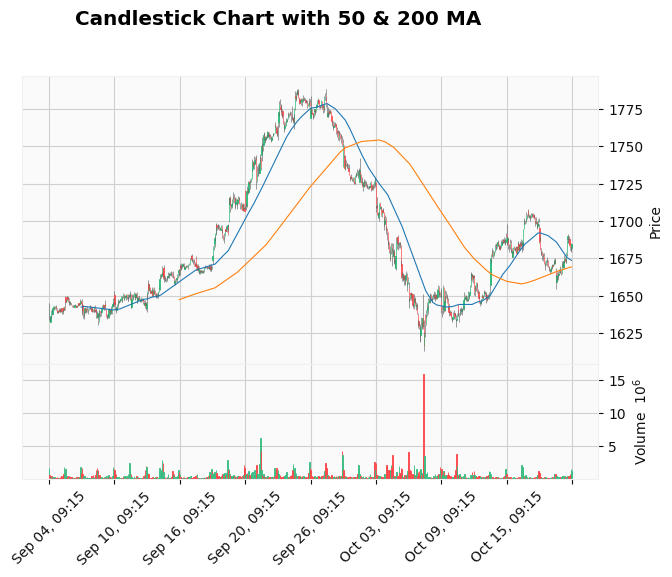

In [37]:


# Setting up the candlestick chart style with moving averages
mpf.plot(data_200.set_index('time'), type='candle', style='yahoo',
         title="Candlestick Chart with 50 & 200 MA",
         ylabel="Price", volume=True,
         mav=(50, 200))


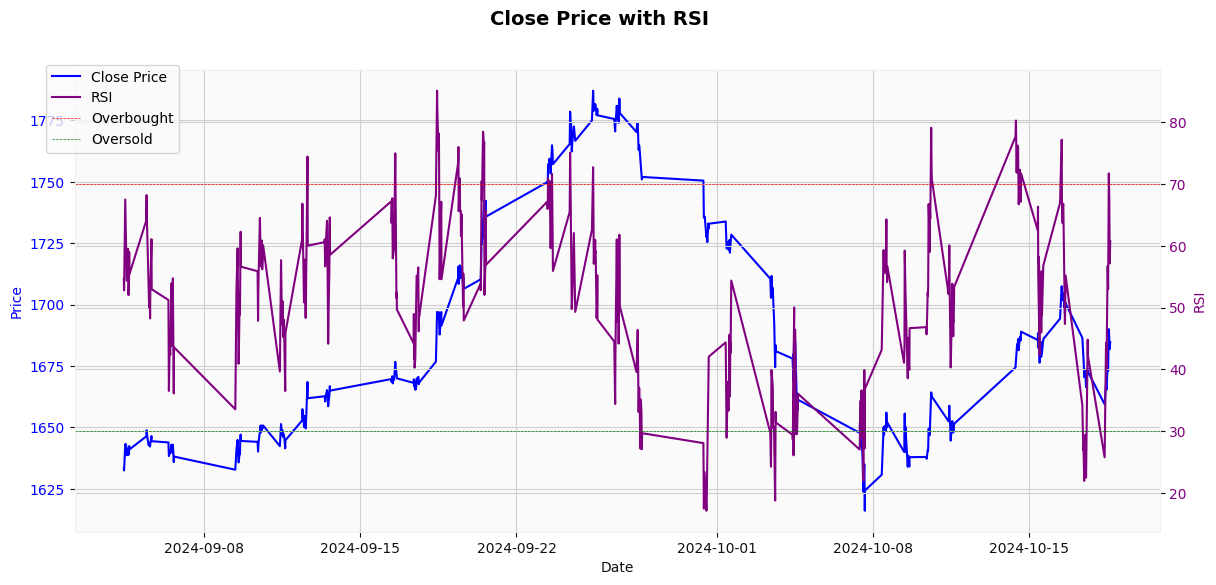

In [38]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Close Price
ax1.plot(data_200['time'], data_200['close'], color="blue", label="Close Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Price", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Plot RSI on Secondary Axis
ax2 = ax1.twinx()
ax2.plot(data_200['time'], data_200['rsi'], color="purple", label="RSI")
ax2.axhline(70, color='red', linestyle='--', linewidth=0.5, label="Overbought")
ax2.axhline(30, color='green', linestyle='--', linewidth=0.5, label="Oversold")
ax2.set_ylabel("RSI", color="purple")
ax2.tick_params(axis='y', labelcolor="purple")

# Add Titles and Legends
fig.suptitle("Close Price with RSI", fontsize=14)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.xticks(rotation=45)
plt.show()


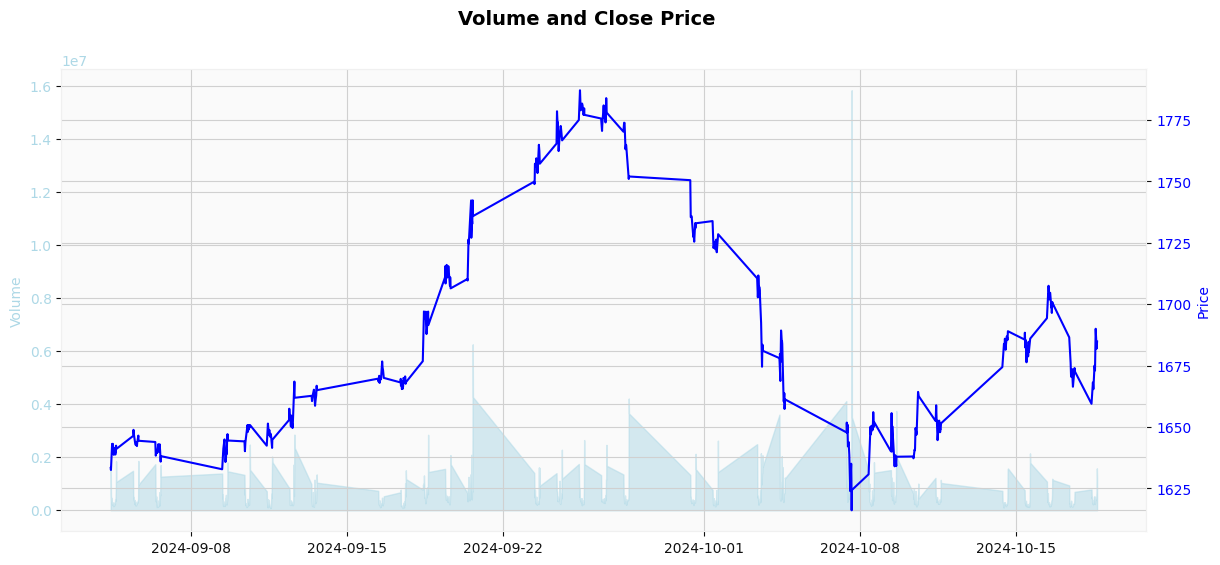

In [39]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Area plot for Volume
ax1.fill_between(data_200['time'], data_200['volume'], color="lightblue", alpha=0.5)
ax1.set_ylabel("Volume", color="lightblue")
ax1.tick_params(axis='y', labelcolor="lightblue")

# Overlay line plot for Close Price
ax2 = ax1.twinx()
ax2.plot(data_200['time'], data_200['close'], color="blue", label="Close Price")
ax2.set_ylabel("Price", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Titles and legends
fig.suptitle("Volume and Close Price", fontsize=14)
plt.xticks(rotation=45)
plt.show()


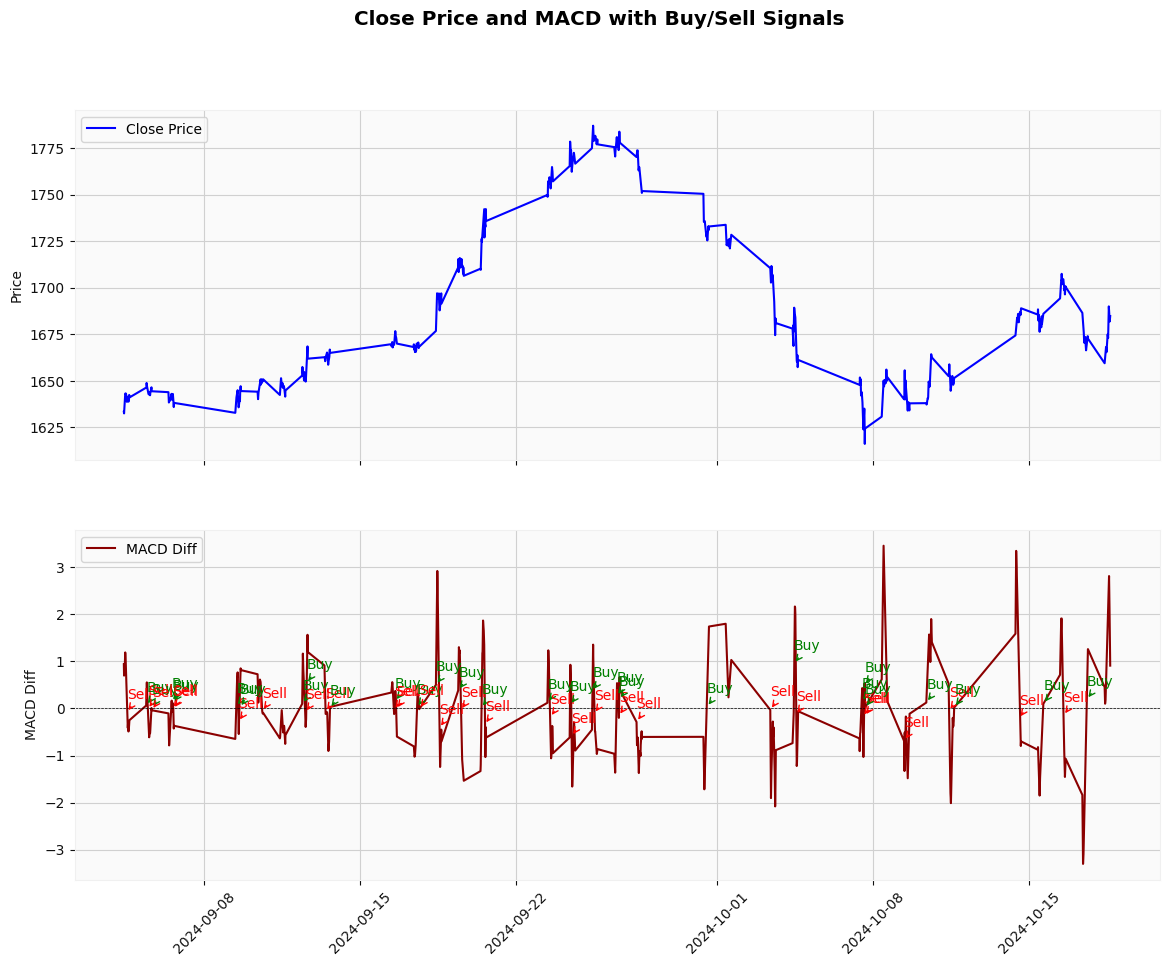

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot Close Price
ax[0].plot(data_200['time'], data_200['close'], label="Close Price", color="blue")
ax[0].set_ylabel("Price")
ax[0].legend(loc="upper left")

# Plot MACD
ax[1].plot(data_200['time'], data_200['macd_diff'], label="MACD Diff", color="darkred")
ax[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
for idx, value in enumerate(data_200['macd_diff']):
    if idx > 0 and (data_200['macd_diff'].iloc[idx-1] < 0 < value):
        ax[1].annotate('Buy', (data_200['time'].iloc[idx], value), color="green", xytext=(0, 10),
                       textcoords='offset points', arrowprops=dict(arrowstyle="->", color='green'))
    elif idx > 0 and (data_200['macd_diff'].iloc[idx-1] > 0 > value):
        ax[1].annotate('Sell', (data_200['time'].iloc[idx], value), color="red", xytext=(0, 10),
                       textcoords='offset points', arrowprops=dict(arrowstyle="->", color='red'))
ax[1].set_ylabel("MACD Diff")
ax[1].legend(loc="upper left")

plt.xticks(rotation=45)
fig.suptitle("Close Price and MACD with Buy/Sell Signals")
plt.show()


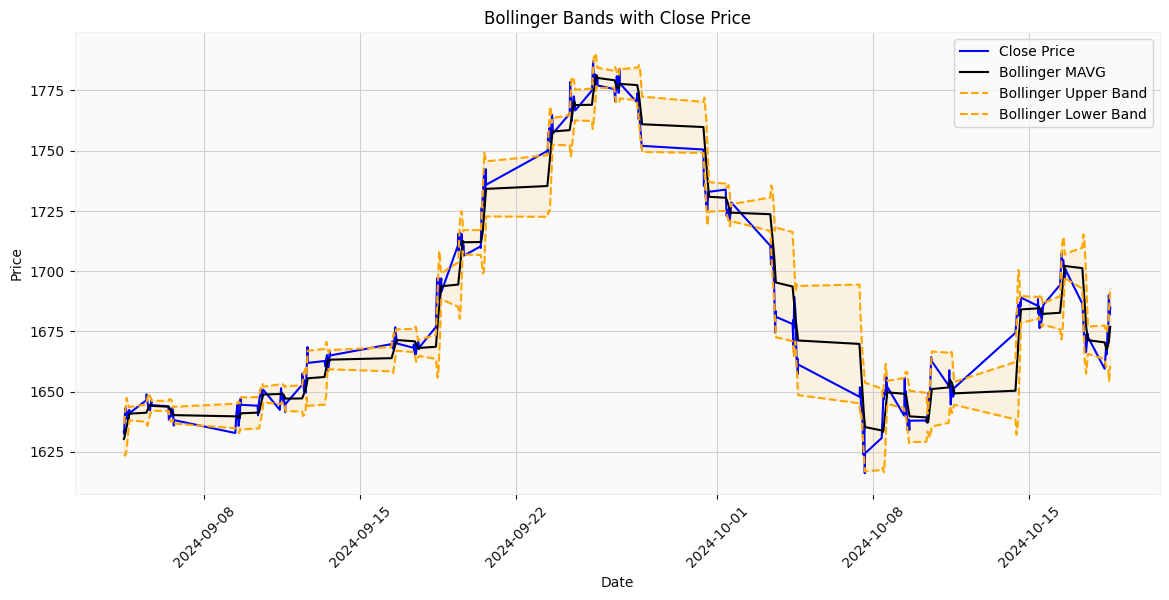

In [41]:
plt.figure(figsize=(14, 6))
plt.plot(data_200['time'], data_200['close'], label="Close Price", color="blue")
plt.plot(data_200['time'], data_200['bollinger_mavg'], label="Bollinger MAVG", color="black")
plt.plot(data_200['time'], data_200['bollinger_hband'], label="Bollinger Upper Band", color="orange", linestyle='--')
plt.plot(data_200['time'], data_200['bollinger_lband'], label="Bollinger Lower Band", color="orange", linestyle='--')
plt.fill_between(data_200['time'], data_200['bollinger_lband'], data_200['bollinger_hband'], color='orange', alpha=0.1)
plt.title("Bollinger Bands with Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()


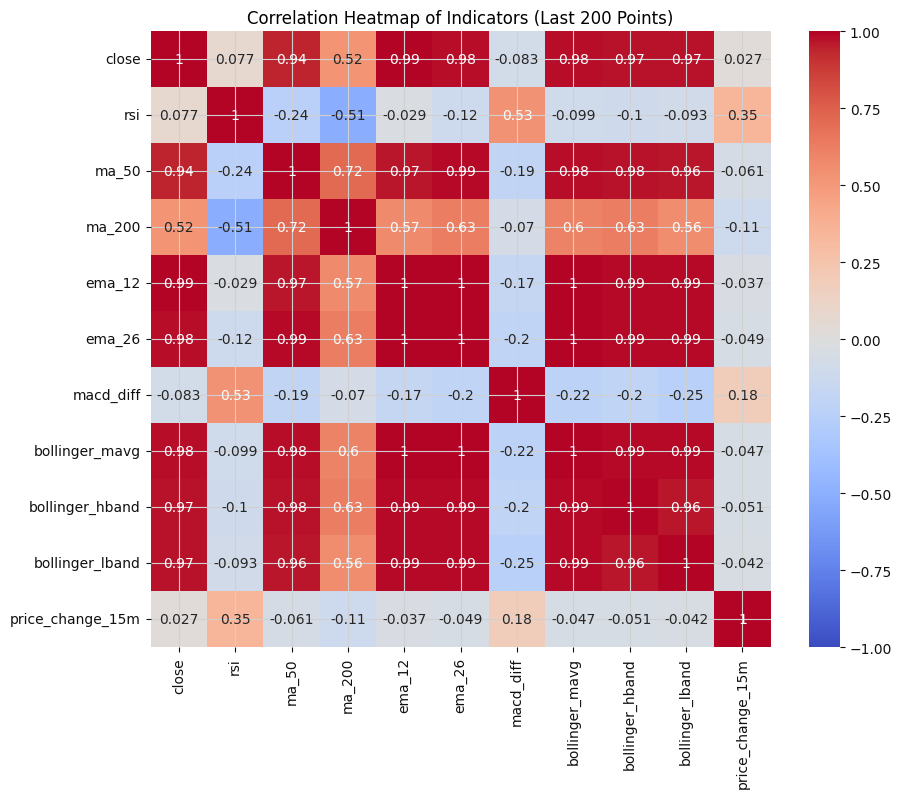

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_200[['close', 'rsi', 'ma_50', 'ma_200', 'ema_12', 'ema_26', 'macd_diff',
                      'bollinger_mavg', 'bollinger_hband', 'bollinger_lband', 'price_change_15m']].corr(),
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Indicators (Last 200 Points)")
plt.show()


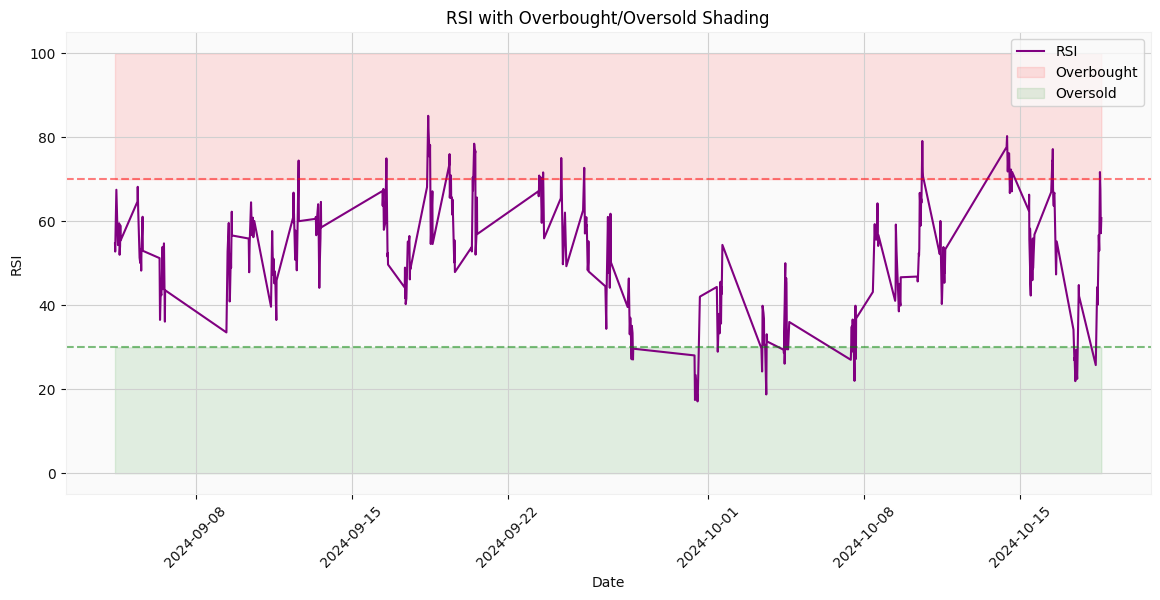

In [43]:
plt.figure(figsize=(14, 6))
plt.plot(data_200['time'], data_200['rsi'], label="RSI", color="purple")
plt.fill_between(data_200['time'], 70, 100, color="red", alpha=0.1, label="Overbought")
plt.fill_between(data_200['time'], 0, 30, color="green", alpha=0.1, label="Oversold")
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title("RSI with Overbought/Oversold Shading")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [44]:
# Create lag features for past values of open, high, low, close (sliding window)
# Adding past 3 candles data as features
df['lag_open_1'] = df['open'].shift(1)
df['lag_high_1'] = df['high'].shift(1)
df['lag_low_1'] = df['low'].shift(1)
df['lag_close_1'] = df['close'].shift(1)

df['lag_open_2'] = df['open'].shift(2)
df['lag_high_2'] = df['high'].shift(2)
df['lag_low_2'] = df['low'].shift(2)
df['lag_close_2'] = df['close'].shift(2)

df['lag_open_3'] = df['open'].shift(3)
df['lag_high_3'] = df['high'].shift(3)
df['lag_low_3'] = df['low'].shift(3)
df['lag_close_3'] = df['close'].shift(3)



In [45]:
data_200 = df.tail(800)
data_200 = data_200.rename(columns={'Volume': 'volume'})

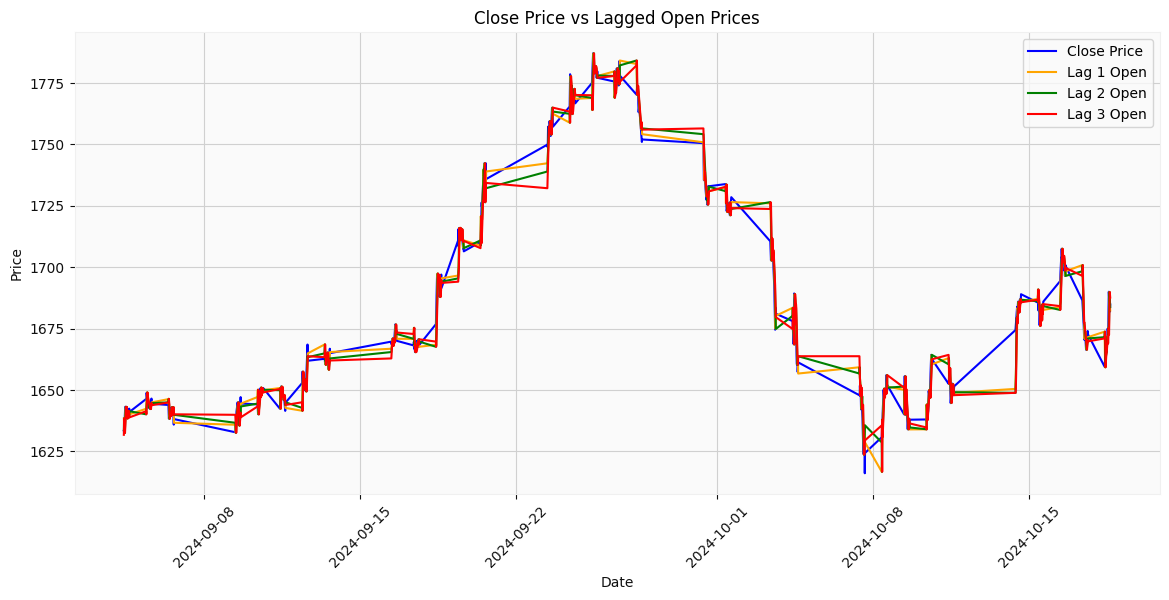

In [46]:
plt.figure(figsize=(14, 6))

# Plot the Close Price vs Lagged Open Prices
plt.plot(data_200['time'], data_200['close'], label="Close Price", color="blue")
plt.plot(data_200['time'], data_200['lag_open_1'], label="Lag 1 Open", color="orange")
plt.plot(data_200['time'], data_200['lag_open_2'], label="Lag 2 Open", color="green")
plt.plot(data_200['time'], data_200['lag_open_3'], label="Lag 3 Open", color="red")

plt.title("Close Price vs Lagged Open Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()


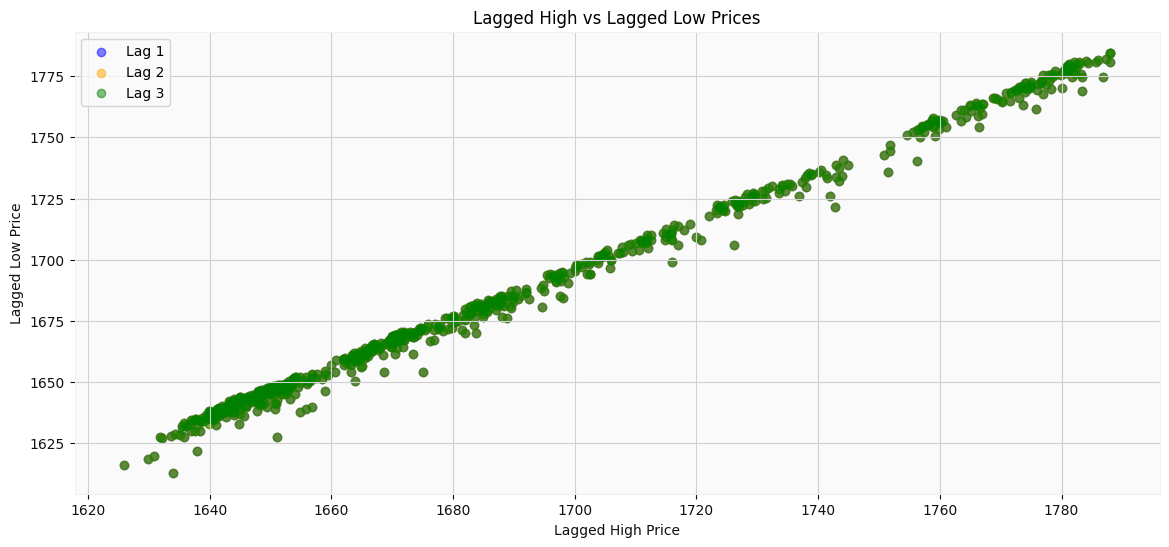

In [47]:
plt.figure(figsize=(14, 6))

# Scatter plot of lagged high vs lagged low prices
plt.scatter(data_200['lag_high_1'], data_200['lag_low_1'], label="Lag 1", alpha=0.5, color="blue")
plt.scatter(data_200['lag_high_2'], data_200['lag_low_2'], label="Lag 2", alpha=0.5, color="orange")
plt.scatter(data_200['lag_high_3'], data_200['lag_low_3'], label="Lag 3", alpha=0.5, color="green")

plt.title("Lagged High vs Lagged Low Prices")
plt.xlabel("Lagged High Price")
plt.ylabel("Lagged Low Price")
plt.legend()
plt.show()


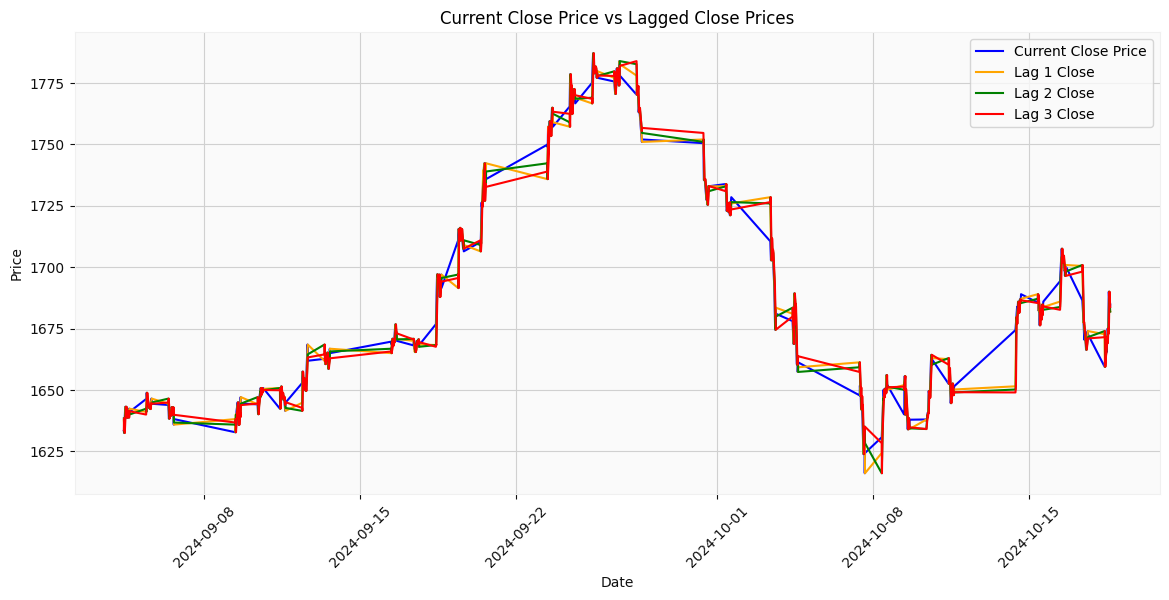

In [48]:
plt.figure(figsize=(14, 6))

# Plot the Close Price vs Lagged Close Prices
plt.plot(data_200['time'], data_200['close'], label="Current Close Price", color="blue")
plt.plot(data_200['time'], data_200['lag_close_1'], label="Lag 1 Close", color="orange")
plt.plot(data_200['time'], data_200['lag_close_2'], label="Lag 2 Close", color="green")
plt.plot(data_200['time'], data_200['lag_close_3'], label="Lag 3 Close", color="red")

plt.title("Current Close Price vs Lagged Close Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()


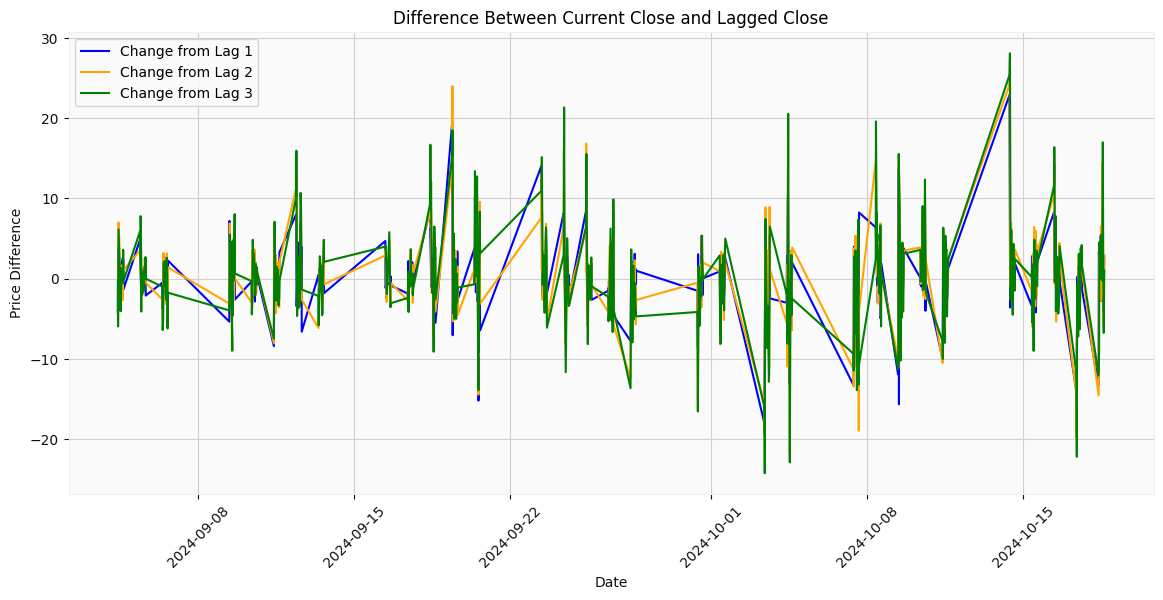

In [49]:
plt.figure(figsize=(14, 6))

# Plot the difference between current close and lagged close
plt.plot(data_200['time'], data_200['close'] - data_200['lag_close_1'], label="Change from Lag 1", color="blue")
plt.plot(data_200['time'], data_200['close'] - data_200['lag_close_2'], label="Change from Lag 2", color="orange")
plt.plot(data_200['time'], data_200['close'] - data_200['lag_close_3'], label="Change from Lag 3", color="green")

plt.title("Difference Between Current Close and Lagged Close")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.legend()
plt.xticks(rotation=45)
plt.show()


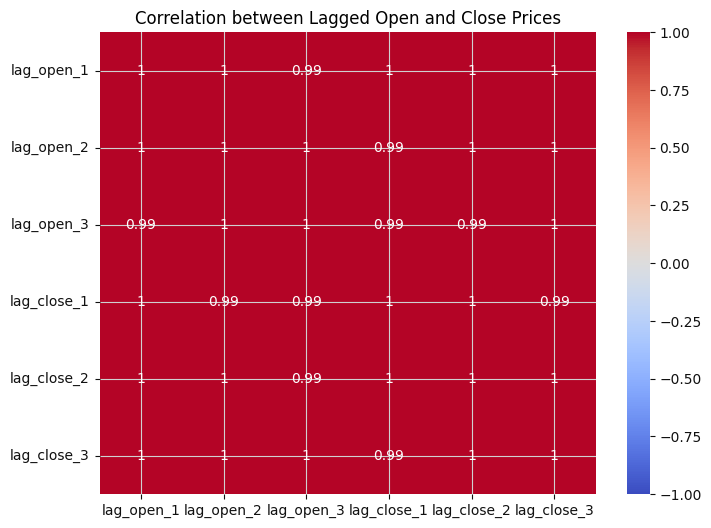

In [51]:
#Correlation Matrix of Lagged Open and Close Prices
lagged_data = data_200[['lag_open_1', 'lag_open_2', 'lag_open_3', 'lag_close_1', 'lag_close_2', 'lag_close_3']]
correlation_matrix = lagged_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between Lagged Open and Close Prices")
plt.show()


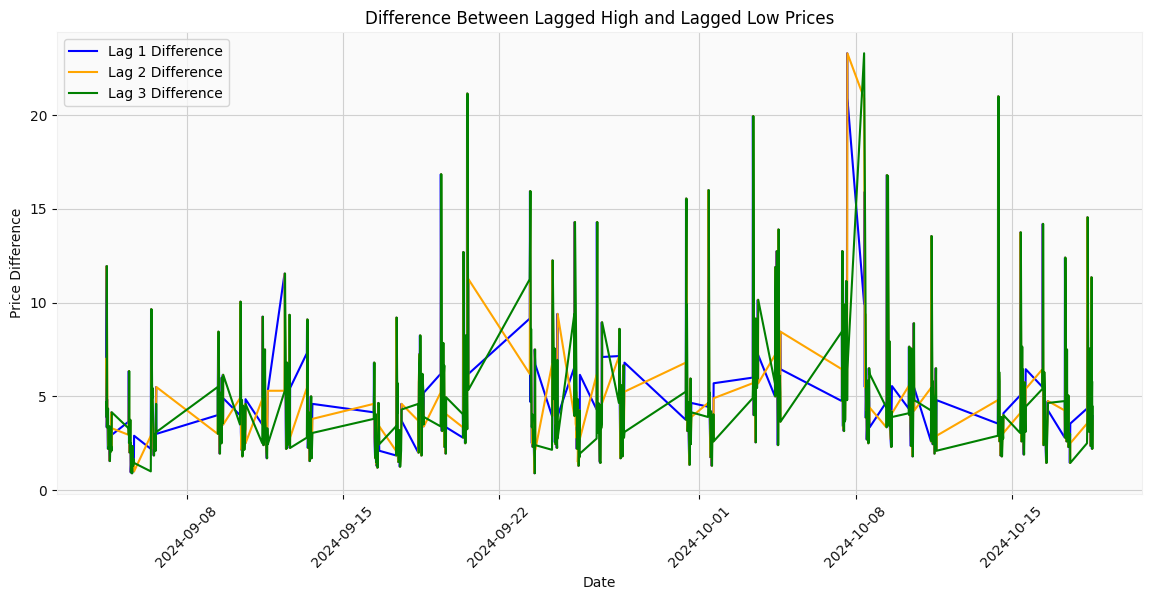

In [52]:
plt.figure(figsize=(14, 6))

# Plot the differences between lagged high and lagged low prices
plt.plot(data_200['time'], data_200['lag_high_1'] - data_200['lag_low_1'], label="Lag 1 Difference", color="blue")
plt.plot(data_200['time'], data_200['lag_high_2'] - data_200['lag_low_2'], label="Lag 2 Difference", color="orange")
plt.plot(data_200['time'], data_200['lag_high_3'] - data_200['lag_low_3'], label="Lag 3 Difference", color="green")

plt.title("Difference Between Lagged High and Lagged Low Prices")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [53]:
df

time     open     high      low    close   Volume  \
0     2021-07-01 09:15:00+05:30  1500.65  1500.65  1491.30  1492.70  1860331   
1     2021-07-01 09:30:00+05:30  1492.10  1493.25  1489.05  1492.50   291342   
2     2021-07-01 09:45:00+05:30  1492.80  1493.35  1491.50  1492.35   332650   
3     2021-07-01 10:00:00+05:30  1492.50  1493.10  1490.00  1490.75   183182   
4     2021-07-01 10:15:00+05:30  1490.75  1497.45  1489.45  1490.80  1635651   
...                         ...      ...      ...      ...      ...      ...   
20404 2024-10-18 14:15:00+05:30  1688.60  1689.60  1687.40  1687.85   395868   
20405 2024-10-18 14:30:00+05:30  1687.65  1688.25  1683.80  1683.80   499103   
20406 2024-10-18 14:45:00+05:30  1683.75  1684.00  1680.30  1681.90   701956   
20407 2024-10-18 15:00:00+05:30  1682.35  1682.95  1679.00  1682.00  1579556   
20408 2024-10-18 15:15:00+05:30  1682.15  1685.35  1680.05  1684.80  1221646   

          MA_50      MA_200        rsi     ma_50  ...  lag_low_1  lag_close_1  \
0           NaN         NaN        NaN       NaN  ...        NaN          NaN   
1           NaN         NaN        NaN       NaN  ...    1491.30      1492.70   
2           NaN         NaN        NaN       NaN  ...    1489.05      1492.50   
3           NaN         NaN        NaN       NaN  ...    1491.50      1492.35   
4           NaN         NaN        NaN       NaN  ...    1490.00      1490.75   
...         ...         ...        ...       ...  ...        ...          ...   
20404  1674.866  1668.56250  67.607502  1674.866  ...    1685.20      1688.65   
20405  1674.613  1668.72600  60.278697  1674.613  ...    1687.40      1687.85   
20406  1674.287  1668.87875  57.148809  1674.287  ...    1683.80      1683.80   
20407  1673.909  1669.03825  57.274552  1673.909  ...    1680.30      1681.90   
20408  1673.595  1669.20225  60.747731  1673.595  ...    1679.00      1682.00   

       lag_open_2  lag_high_2  lag_low_2  lag_close_2  lag_open_3  lag_high_3  \
0             NaN         NaN        NaN          NaN         NaN         NaN   
1             NaN         NaN        NaN          NaN         NaN         NaN   
2         1500.65     1500.65    1491.30      1492.70         NaN         NaN   
3         1492.10     1493.25    1489.05      1492.50     1500.65     1500.65   
4         1492.80     1493.35    1491.50      1492.35     1492.10     1493.25   
...           ...         ...        ...          ...         ...         ...   
20404     1687.80     1690.00    1685.30      1690.00     1678.50     1688.10   
20405     1689.90     1691.00    1685.20      1688.65     1687.80     1690.00   
20406     1688.60     1689.60    1687.40      1687.85     1689.90     1691.00   
20407     1687.65     1688.25    1683.80      1683.80     1688.60     1689.60   
20408     1683.75     1684.00    1680.30      1681.90     1687.65     1688.25   

       lag_low_3  lag_close_3  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3        1491.30      1492.70  
4        1489.05      1492.50  
...          ...          ...  
20404    1676.75      1687.45  
20405    1685.30      1690.00  
20406    1685.20      1688.65  
20407    1687.40      1687.85  
20408    1683.80      1683.80  

[20409 rows x 30 columns]

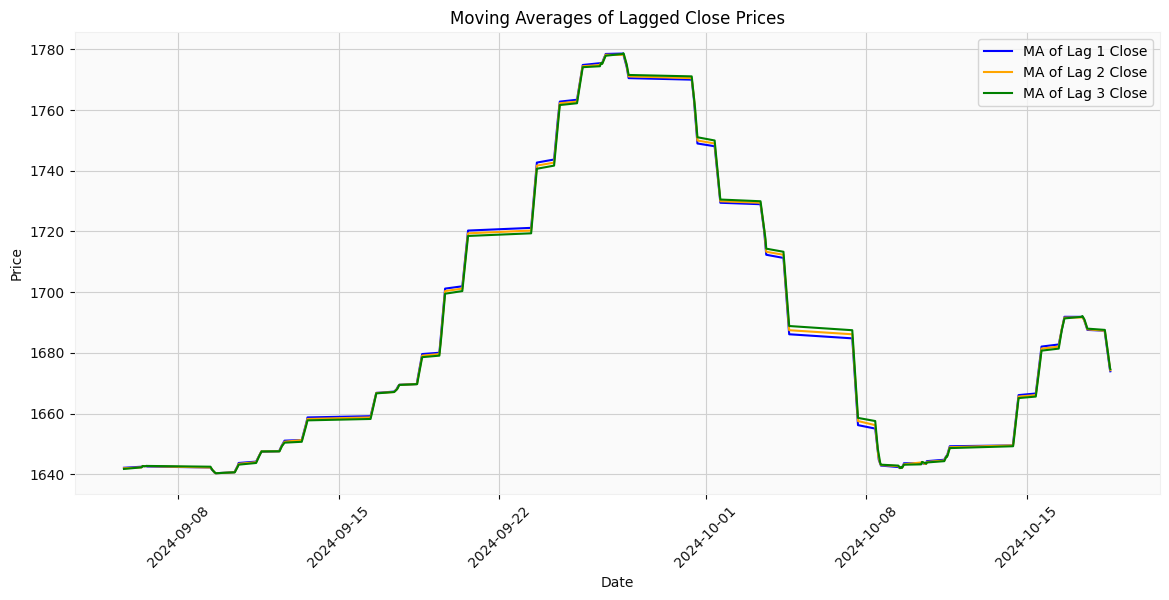

In [55]:
# Calculate moving averages for lagged close prices
data_200['ma_lag_close_1'] = data_200['lag_close_1'].rolling(window=50).mean()
data_200['ma_lag_close_2'] = data_200['lag_close_2'].rolling(window=50).mean()
data_200['ma_lag_close_3'] = data_200['lag_close_3'].rolling(window=50).mean()

plt.figure(figsize=(14, 6))

# Plot the moving averages of lagged close prices
plt.plot(data_200['time'], data_200['ma_lag_close_1'], label="MA of Lag 1 Close", color="blue")
plt.plot(data_200['time'], data_200['ma_lag_close_2'], label="MA of Lag 2 Close", color="orange")
plt.plot(data_200['time'], data_200['ma_lag_close_3'], label="MA of Lag 3 Close", color="green")

plt.title("Moving Averages of Lagged Close Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [56]:
# Drop rows with NaN values generated by shifts
df.dropna(inplace=True)



In [57]:
print(df.head())

                         time     open    high      low    close   Volume  \
199 2021-07-12 15:15:00+05:30  1486.95  1488.0  1485.35  1487.30   417198   
200 2021-07-13 09:15:00+05:30  1496.10  1497.4  1484.10  1486.40  1478539   
201 2021-07-13 09:30:00+05:30  1486.45  1487.5  1485.00  1487.00   239159   
202 2021-07-13 09:45:00+05:30  1487.20  1488.1  1486.25  1487.65   488656   
203 2021-07-13 10:00:00+05:30  1487.60  1489.7  1487.05  1488.75   636415   

        MA_50     MA_200        rsi     ma_50  ...  lag_low_1  lag_close_1  \
199  1500.145  1507.7065  34.021463  1500.145  ...    1486.00      1486.95   
200  1499.709  1507.6750  32.670444  1499.709  ...    1485.35      1487.30   
201  1499.324  1507.6475  34.536819  1499.324  ...    1484.10      1486.40   
202  1498.991  1507.6240  36.587576  1498.991  ...    1485.00      1487.00   
203  1498.617  1507.6140  40.012433  1498.617  ...    1486.25      1487.65   

     lag_open_2  lag_high_2  lag_low_2  lag_close_2  lag_open_3  lag

In [58]:
scaler = StandardScaler()
scaled_features = ['open', 'high', 'low', 'close', 'rsi', 'ma_50', 'ma_200', 'ema_12', 'ema_26', 'macd_diff',
                   'bollinger_mavg', 'bollinger_hband', 'bollinger_lband', 'price_change_15m',
                   'lag_open_1', 'lag_high_1', 'lag_low_1', 'lag_close_1',
                   'lag_open_2', 'lag_high_2', 'lag_low_2', 'lag_close_2',
                   'lag_open_3', 'lag_high_3', 'lag_low_3', 'lag_close_3']

df[scaled_features] = scaler.fit_transform(df[scaled_features])

In [59]:
# Buy when RSI is below 30 and price is above 50-period moving average
buy_condition = (df['rsi'] < 30) & (df['close'] > df['ma_50'])

# Sell when RSI is above 70 or price is below 50-period moving average
sell_condition = (df['rsi'] > 70) | (df['close'] < df['ma_50'])

# Stop Loss and Profit levels
stop_loss_pct = 0.02  # 2% stop loss
take_profit_pct = 0.05  # 5% take profit

In [60]:
# Create columns for buy, sell signals
df['buy_signal'] = 0
df['sell_signal'] = 0
df['buy_signal'][buy_condition] = 1
df['sell_signal'][sell_condition] = 1

# Initialize stop loss and profit target columns
df['stop_loss'] = np.nan
df['take_profit'] = np.nan

<ipython-input-60-adcb97baa5d7>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['buy_signal'][buy_condition] = 1
<ipython-input-60-adcb97baa5d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [61]:
# Loop through the rows and calculate stop loss and take profit after a buy signal
for i in range(len(df)):
    if df['buy_signal'].iloc[i] == 1:
        buy_price = df['close'].iloc[i]
        # Define stop loss and profit levels based on the buy price
        stop_loss_price = buy_price * (1 - stop_loss_pct)
        take_profit_price = buy_price * (1 + take_profit_pct)

        # Update stop loss and take profit columns
        df.loc[i, 'stop_loss'] = stop_loss_price
        df.loc[i, 'take_profit'] = take_profit_price

# Forward fill stop loss and take profit prices after a buy signal
df['stop_loss'].fillna(method='ffill', inplace=True)
df['take_profit'].fillna(method='ffill', inplace=True)

<ipython-input-61-a3b714d8ecd4>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stop_loss'].fillna(method='ffill', inplace=True)
<ipython-input-61-a3b714d8ecd4>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['stop_loss'].fillna(method='ffill', inplace=True)
<ipython-input-61-a3b714d8ecd4>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The beh

In [62]:
# Create target labels for the machine learning model
# 1 = Buy, -1 = Sell, 0 = Hold (No action)
df['action'] = 0.5
df.loc[df['buy_signal'] == 1, 'action'] = 1
df.loc[df['sell_signal'] == 1, 'action'] = 0

# Drop any rows with NaN values remaining from previous operations
df.dropna(inplace=True)


In [63]:
# Check the final dataframe with labels
print(df[['time', 'close', 'rsi', 'buy_signal', 'sell_signal', 'stop_loss', 'take_profit', 'action']].tail())

                           time     close       rsi  buy_signal  sell_signal  \
20404 2024-10-18 14:15:00+05:30  1.398235  1.249384         1.0          0.0   
20405 2024-10-18 14:30:00+05:30  1.358923  0.711009         1.0          0.0   
20406 2024-10-18 14:45:00+05:30  1.340480  0.481087         1.0          0.0   
20407 2024-10-18 15:00:00+05:30  1.341451  0.490324         1.0          0.0   
20408 2024-10-18 15:15:00+05:30  1.368629  0.745464         1.0          0.0   

       stop_loss  take_profit  action  
20404   1.341257     1.437061     1.0  
20405   1.341257     1.437061     1.0  
20406   1.341257     1.437061     1.0  
20407   1.341257     1.437061     1.0  
20408   1.341257     1.437061     1.0  


In [64]:
# Selecting only the last 200 data points
data_200 = df[-100:]
# Rename 'Volume' column to 'volume'
data_200.rename(columns={'Volume': 'volume'}, inplace=True)

<ipython-input-64-d6a9672f1e1d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_200.rename(columns={'Volume': 'volume'}, inplace=True)


In [65]:
data_200.head()

time      open      high       low     close  \
20309 2024-10-15 09:15:00+05:30  1.427288  1.474177  1.386266  1.376395   
20310 2024-10-15 09:30:00+05:30  1.376344  1.394107  1.384810  1.403573   
20311 2024-10-15 09:45:00+05:30  1.399632  1.380519  1.355705  1.356496   
20312 2024-10-15 10:00:00+05:30  1.355481  1.337330  1.335331  1.344848   
20313 2024-10-15 10:15:00+05:30  1.344322  1.344124  1.364437  1.356011   

         volume     MA_50      MA_200       rsi     ma_50  ...  lag_close_2  \
20309  756685.0  1667.261  1659.51125  0.873002  1.209642  ...     1.391734   
20310  263730.0  1667.969  1659.40775  1.155319  1.216567  ...     1.409693   
20311  271886.0  1668.520  1659.30425  0.373630  1.221956  ...     1.376688   
20312  337739.0  1668.990  1659.20200  0.205929  1.226553  ...     1.403868   
20313  175988.0  1669.541  1659.09400  0.344877  1.231942  ...     1.356787   

       lag_open_3  lag_high_3  lag_low_3  lag_close_3  buy_signal  \
20309    1.387456    1.372703   1.388642     1.374891         1.0   
20310    1.381633    1.379497   1.385246     1.391879         1.0   
20311    1.390367    1.416867   1.413384     1.409839         1.0   
20312    1.427730    1.474621   1.386701     1.376832         1.0   
20313    1.376781    1.394542   1.385246     1.404014         1.0   

       sell_signal  stop_loss  take_profit  action  
20309          0.0   1.341257     1.437061     1.0  
20310          0.0   1.341257     1.437061     1.0  
20311          0.0   1.341257     1.437061     1.0  
20312          0.0   1.341257     1.437061     1.0  
20313          0.0   1.341257     1.437061     1.0  

[5 rows x 35 columns]

In [66]:
features = df[['open', 'high', 'low', 'close', 'rsi', 'ma_50', 'ma_200', 'ema_12', 'ema_26', 'macd_diff',
               'bollinger_mavg', 'bollinger_hband', 'bollinger_lband', 'price_change_15m',
               'lag_open_1', 'lag_high_1', 'lag_low_1', 'lag_close_1',
               'lag_open_2', 'lag_high_2', 'lag_low_2', 'lag_close_2',
               'lag_open_3', 'lag_high_3', 'lag_low_3', 'lag_close_3']]
target = df['action']  # 1 = Buy, -1 = Sell, 0 = Hold


In [67]:

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

In [68]:
# 1. Random Forest Classifier
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Evaluation: ")
print("Accuracy: ", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))


Training Random Forest Classifier...
Random Forest Evaluation: 
Accuracy:  0.9529353480307159
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1821
         1.0       0.96      0.95      0.96      2216

    accuracy                           0.95      4037
   macro avg       0.95      0.95      0.95      4037
weighted avg       0.95      0.95      0.95      4037

[[1744   77]
 [ 113 2103]]


In [69]:
# 2. XGBoost Classifier
print("Training XGBoost Classifier...")
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)


Training XGBoost Classifier...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:49:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [70]:

# Evaluate XGBoost
print("XGBoost Evaluation:")
print("Accuracy: ", accuracy_score(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))
print(confusion_matrix(y_test, xgb_predictions))


XGBoost Evaluation:
Accuracy:  0.9633391132028735
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1821
         1.0       0.97      0.96      0.97      2216

    accuracy                           0.96      4037
   macro avg       0.96      0.96      0.96      4037
weighted avg       0.96      0.96      0.96      4037

[[1766   55]
 [  93 2123]]


In [71]:
# 3. Support Vector Machine (SVM)
print("Training SVM Classifier...")
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Evaluate SVM
print("SVM Evaluation:")
print("Accuracy: ", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))
print(confusion_matrix(y_test, svm_predictions))

Training SVM Classifier...
SVM Evaluation:
Accuracy:  0.9588803567005202
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1821
         1.0       0.97      0.96      0.96      2216

    accuracy                           0.96      4037
   macro avg       0.96      0.96      0.96      4037
weighted avg       0.96      0.96      0.96      4037

[[1752   69]
 [  97 2119]]


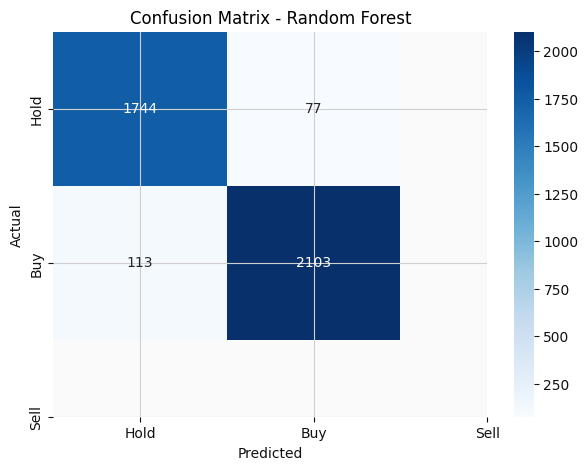

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Hold", "Buy", "Sell"], yticklabels=["Hold", "Buy", "Sell"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(rf_cm, "Random Forest")


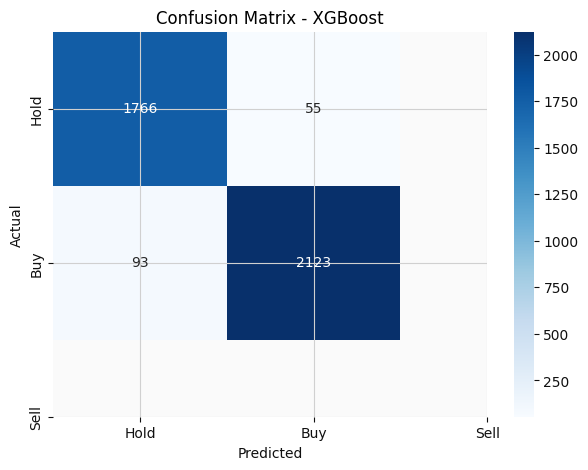

In [73]:
# Confusion Matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_predictions)
plot_confusion_matrix(xgb_cm, "XGBoost")

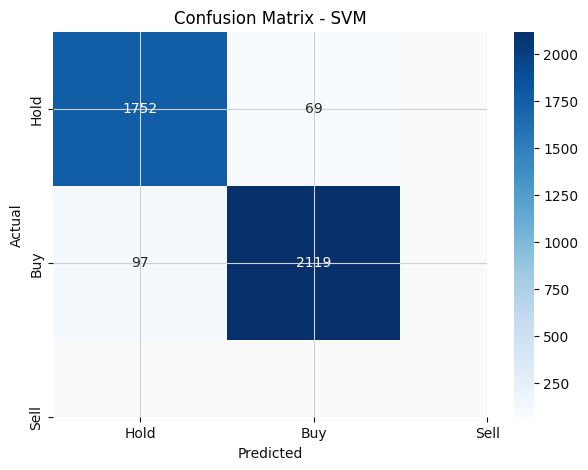

In [74]:
# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix(svm_cm, "SVM")

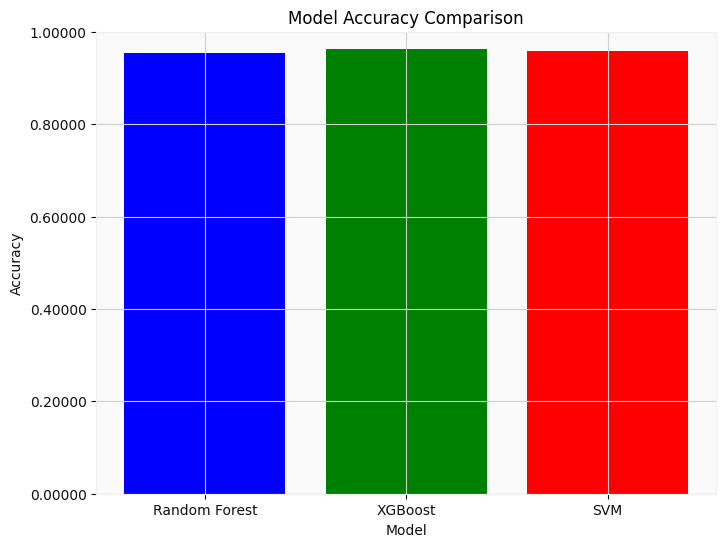

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Accuracy scores
rf_accuracy = accuracy_score(y_test, rf_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Create a bar chart to compare accuracies
plt.figure(figsize=(8, 6))
models = ['Random Forest', 'XGBoost', 'SVM']
accuracies = [rf_accuracy, xgb_accuracy, svm_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

# Format y-axis to show decimals up to 5 places
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.5f}'))  # Show 5 decimals

plt.show()


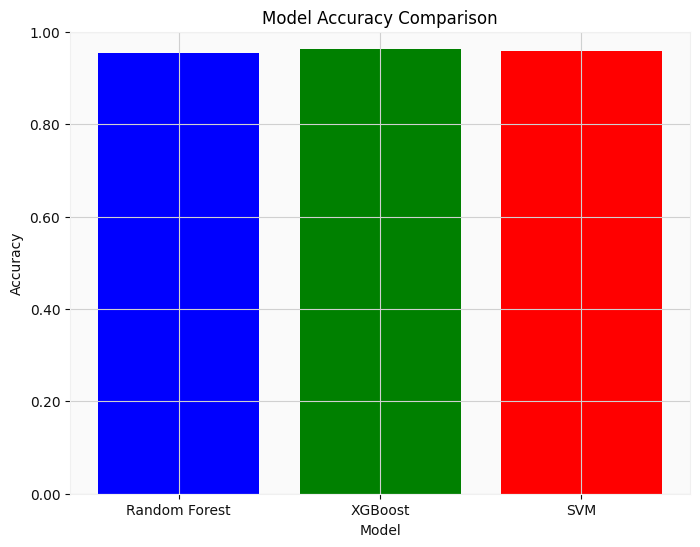

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Accuracy scores
rf_accuracy = accuracy_score(y_test, rf_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Create a bar chart to compare accuracies
plt.figure(figsize=(8, 6))
models = ['Random Forest', 'XGBoost', 'SVM']
accuracies = [rf_accuracy, xgb_accuracy, svm_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

# Format y-axis to show decimals
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))  # Show 2 decimals

plt.show()


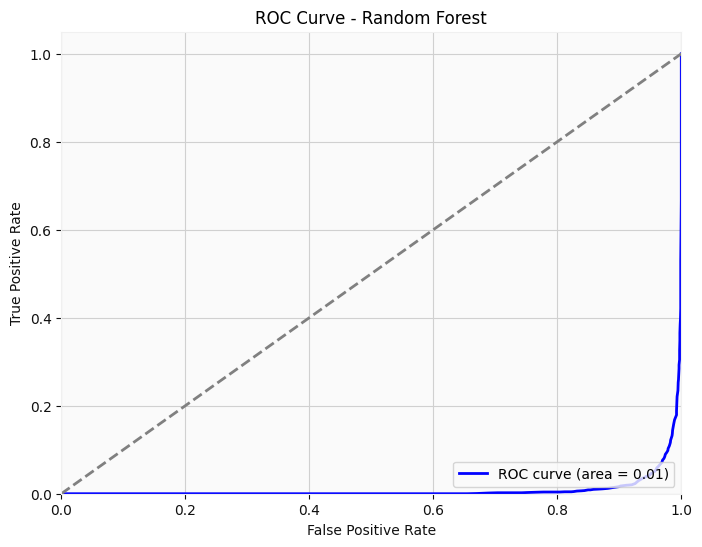

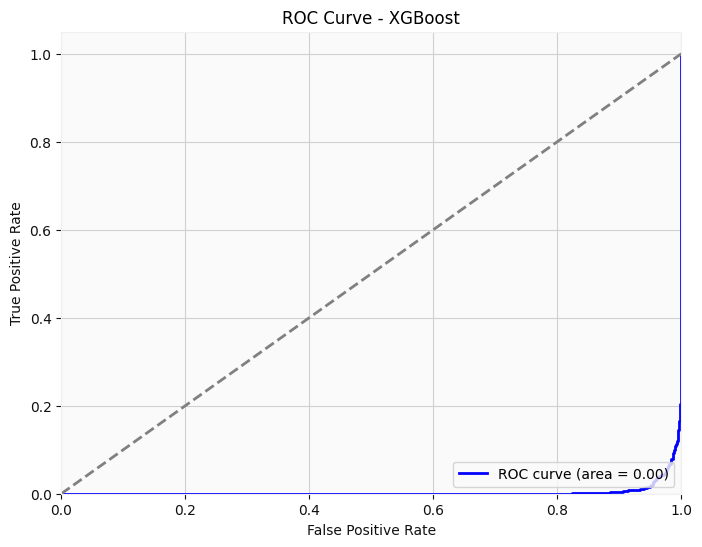

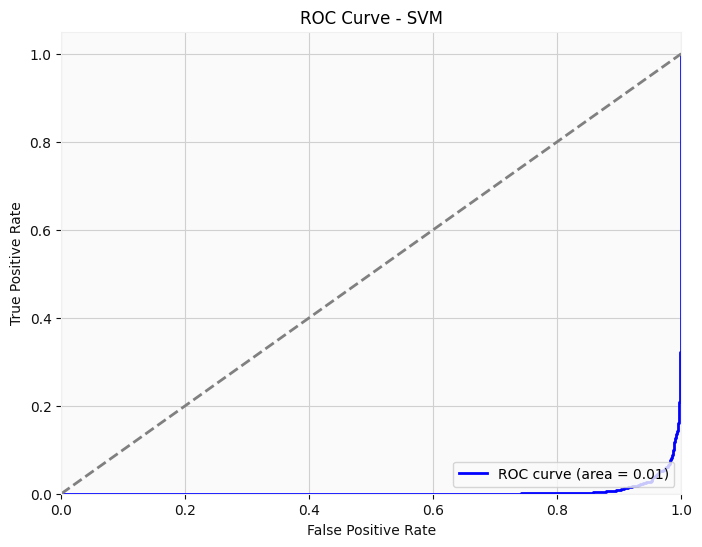

In [77]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, -1])  # Assuming 0=Hold, 1=Buy, -1=Sell

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc_score, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# ROC Curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin[:, 0], rf_model.predict_proba(X_test)[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)
plot_roc_curve(rf_fpr, rf_tpr, rf_auc, "Random Forest")

# ROC Curve for XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_bin[:, 0], xgb_model.predict_proba(X_test)[:, 1])
xgb_auc = auc(xgb_fpr, xgb_tpr)
plot_roc_curve(xgb_fpr, xgb_tpr, xgb_auc, "XGBoost")

# ROC Curve for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test_bin[:, 0], svm_model.decision_function(X_test))
svm_auc = auc(svm_fpr, svm_tpr)
plot_roc_curve(svm_fpr, svm_tpr, svm_auc, "SVM")


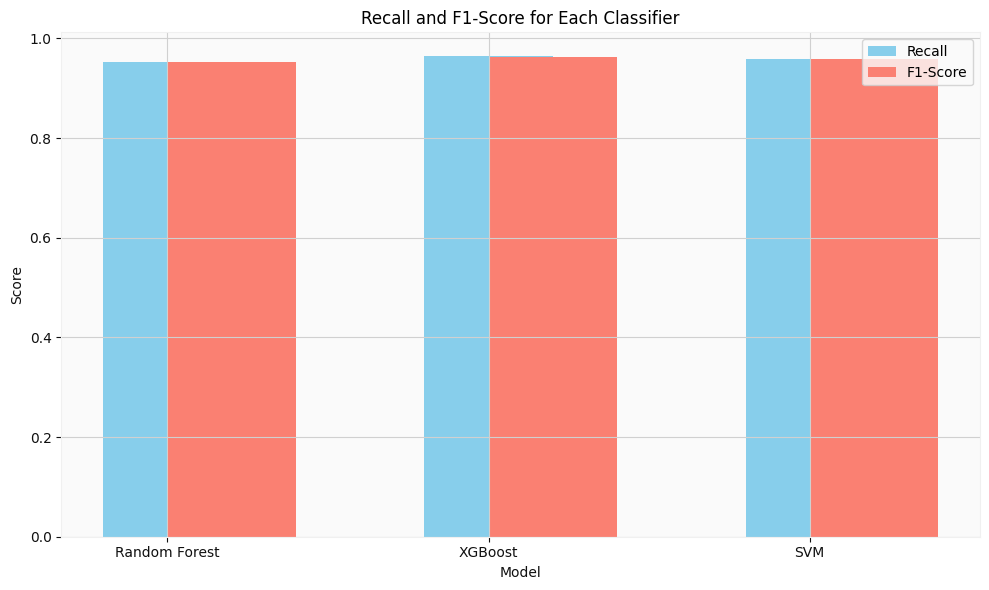

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Calculate classification report for each model
rf_report = classification_report(y_test, rf_predictions, output_dict=True)
xgb_report = classification_report(y_test, xgb_predictions, output_dict=True)
svm_report = classification_report(y_test, svm_predictions, output_dict=True)

# Convert the reports into dataframes
rf_df = pd.DataFrame(rf_report).transpose()
xgb_df = pd.DataFrame(xgb_report).transpose()
svm_df = pd.DataFrame(svm_report).transpose()

# Set up the plot size
plt.figure(figsize=(10, 6))

# Plot recall and F1-score for each model
models = ['Random Forest', 'XGBoost', 'SVM']
metrics = ['recall', 'f1-score']

# Extract the relevant metrics
recall_scores = [rf_df.loc['macro avg', 'recall'], xgb_df.loc['macro avg', 'recall'], svm_df.loc['macro avg', 'recall']]
f1_scores = [rf_df.loc['macro avg', 'f1-score'], xgb_df.loc['macro avg', 'f1-score'], svm_df.loc['macro avg', 'f1-score']]

# Plot recall scores
plt.bar(models, recall_scores, width=0.4, label='Recall', align='center', color='skyblue')

# Plot F1 scores
plt.bar(models, f1_scores, width=0.4, label='F1-Score', align='edge', color='salmon')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Recall and F1-Score for Each Classifier')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
